# Problem 1:

A research laboratory was developing a new compound for the relief of severe cases of hay fever. In an experiment with 36 volunteers, the amounts of the two active ingredients (A & B) in the compound were varied at three levels each. Randomization was used in assigning four volunteers to each of the nine treatments. The data on hours of relief can be found in the following .csv file: Fever.csv

[Assume all of the ANOVA assumptions are satisfied]

# Solution 1:

Importing Essentials:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
from pandas_profiling import ProfileReport
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df_ab=pd.read_csv('Fever-1.csv')

Basic EDA:

In [3]:
#Shape of the DataFrame
df_ab.shape

(36, 4)

In [4]:
df_ab.head()

,A,B,Volunteer,Relief
0,1,1,1,2.4
1,1,1,2,2.7
2,1,1,3,2.3
3,1,1,4,2.5
4,1,2,1,4.6


In [5]:
#Basic Information with Datatype, NULL and Count information
df_ab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   A          36 non-null     int64  
 1   B          36 non-null     int64  
 2   Volunteer  36 non-null     int64  
 3   Relief     36 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 1.2 KB


In [6]:
#Describe function performed before converting the necessary columns to categorical
df_ab.describe(include='all')

,A,B,Volunteer,Relief
count,36.000000,36.000000,36.000000,36.000000
mean,2.000000,2.000000,2.500000,7.183333
std,0.828079,0.828079,1.133893,3.272090
min,1.000000,1.000000,1.000000,2.300000
25%,1.000000,1.000000,1.750000,4.675000
50%,2.000000,2.000000,2.500000,6.000000
75%,3.000000,3.000000,3.250000,9.325000
max,3.000000,3.000000,4.000000,13.500000


In [7]:
#check for NULL values
df_ab.isnull().sum()

A            0
B            0
Volunteer    0
Relief       0
dtype: int64

In [8]:
#Converting Column B into Categorical
df_ab.B=pd.Categorical(df_ab.B)

In [9]:
#Converting Column A into Categorical
df_ab.A=pd.Categorical(df_ab.A)

In [10]:
#Checking for trhe information after conversion
df_ab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   A          36 non-null     category
 1   B          36 non-null     category
 2   Volunteer  36 non-null     int64   
 3   Relief     36 non-null     float64 
dtypes: category(2), float64(1), int64(1)
memory usage: 984.0 bytes


In [11]:
#Checking the Value counts of column A
df_ab.A.value_counts()

3    12
2    12
1    12
Name: A, dtype: int64

In [12]:
#Checking the Value counts of column B
df_ab.B.value_counts()

3    12
2    12
1    12
Name: B, dtype: int64

In [13]:
#Checking the Value counts of column Volunteer
df_ab.Volunteer.value_counts()

4    9
3    9
2    9
1    9
Name: Volunteer, dtype: int64

Question 1.1)

State the Null and Alternate Hypothesis for conducting one-way ANOVA for both the variables ‘A’ and ‘B’ individually. [both statement and statistical form like Ho=mu, Ha>mu]

Null and Alternate Hypothesis for Conducting one-way ANOVA with variable 'A':

Statement Form:

The NULL hypothesis for ANOVA is that the mean is the same for all groups of Column A.
The Alternate hypothesis is that the average is not the same for all groups of Column A.

Statistical Form:

Ho : μ1 = μ2 = μ3

Ha : μ1 ≠ μ2 ≠ μ3 or μ1 = μ2 ≠ μ3 or μ1 ≠ μ2 = μ3


Null and Alternate Hypothesis for Conducting one-way ANOVA with variable 'B':

Statement Form:

The NULL hypothesis for ANOVA is that the mean is the same for all groups of Column B.
The Alternate hypothesis is that the average is not the same for all groups of Column B.

Statistical Form:

Ho : μ1 = μ2 = μ3

Ha : μ1 ≠ μ2 ≠ μ3 or μ1 = μ2 ≠ μ3 or μ1 ≠ μ2 = μ3

In [14]:
df_new = pd.melt(df_ab, id_vars = 'Volunteer')
ind_val = np.arange(1,36)
ind_val = pd.DataFrame(ind_val)
ind_val.shape

(35, 1)

Question 1.2) Perform one-way ANOVA for variable ‘A’ with respect to the variable ‘Relief’. State whether the Null Hypothesis is accepted or rejected based on the ANOVA results.

In [15]:
formula = 'Relief ~ C(A)'
model = ols(formula, df_ab).fit()
aov_table = anova_lm(model)
print(aov_table)

            df  sum_sq     mean_sq          F        PR(>F)
C(A)       2.0  220.02  110.010000  23.465387  4.578242e-07
Residual  33.0  154.71    4.688182        NaN           NaN


Since the P-Value is less than 0.05(aplha) we can say that Null hypothesis is rejected and there is a significance for A in Relief

1.3) Perform one-way ANOVA for variable ‘B’ with respect to the variable ‘Relief’. State whether the Null Hypothesis is accepted or rejected based on the ANOVA results.

In [16]:
formula = 'Relief ~ C(B)'
model = ols(formula, df_ab).fit()
aov_table = anova_lm(model)
print(aov_table)

            df  sum_sq    mean_sq         F   PR(>F)
C(B)       2.0  123.66  61.830000  8.126777  0.00135
Residual  33.0  251.07   7.608182       NaN      NaN


Since the P-Value is less than 0.05(aplha) we can say that Null hypothesis is rejected and there is a significance for B in Relief

Question 1.4) Analyse the effects of one variable on another with the help of an interaction plot.
What is the interaction between the two treatments?
[hint: use the ‘pointplot’ function from the ‘seaborn’ function]

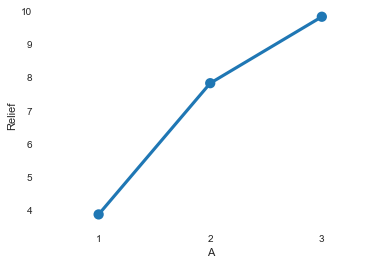

In [17]:
plot1 = sns.pointplot(x='A', y='Relief', data=df_ab,ci=None)

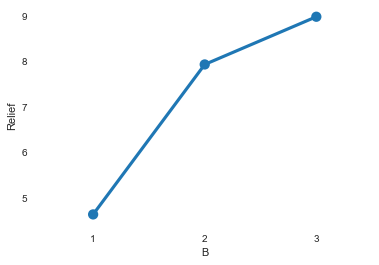

In [18]:
plot2 = sns.pointplot(x='B', y='Relief', data=df_ab,ci=None)

<AxesSubplot:xlabel='A', ylabel='Relief'>

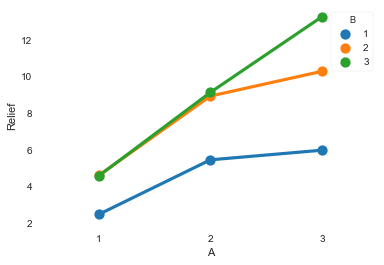

In [19]:
sns.pointplot(x='A', y='Relief', data=df_ab, hue='B',ci=None)

<AxesSubplot:xlabel='B', ylabel='Relief'>

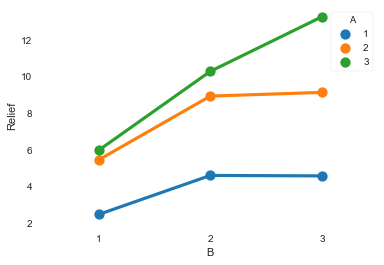

In [20]:
sns.pointplot(x='B', y='Relief', data=df_ab, hue='A',ci=None)

Question 1.5) Perform a two-way ANOVA based on the different ingredients (variable ‘A’ & ‘B’ along with their interaction 'A*B') with the variable 'Relief' and state your results.

In [21]:
formula = 'Relief ~ C(A) + C(B) + C(A):C(B)'
model = ols(formula, df_ab).fit()
aov_table = anova_lm(model)
print(aov_table)

             df   sum_sq     mean_sq            F        PR(>F)
C(A)        2.0  220.020  110.010000  1827.858462  1.514043e-29
C(B)        2.0  123.660   61.830000  1027.329231  3.348751e-26
C(A):C(B)   4.0   29.425    7.356250   122.226923  6.972083e-17
Residual   27.0    1.625    0.060185          NaN           NaN


In [122]:
formula = 'Relief ~ C(A) + C(B)'
model = ols(formula, df_ab).fit()
aov_table = anova_lm(model)
print(aov_table)

            df  sum_sq     mean_sq           F        PR(>F)
C(A)       2.0  220.02  110.010000  109.832850  8.514029e-15
C(B)       2.0  123.66   61.830000   61.730435  1.546749e-11
Residual  31.0   31.05    1.001613         NaN           NaN


In [22]:
model = ols('Relief~C(A)+C(B)+C(A):C(B)',data=df_ab).fit()
aov_table=anova_lm(model)
print(aov_table)

             df   sum_sq     mean_sq            F        PR(>F)
C(A)        2.0  220.020  110.010000  1827.858462  1.514043e-29
C(B)        2.0  123.660   61.830000  1027.329231  3.348751e-26
C(A):C(B)   4.0   29.425    7.356250   122.226923  6.972083e-17
Residual   27.0    1.625    0.060185          NaN           NaN


1.6) Mention the business implications of performing ANOVA for this particular case study.

In [23]:
mc = MultiComparison(df_ab['Relief'],df_ab['A'])
result = mc.tukeyhsd()
print(result.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2     3.95  0.001  1.7814 6.1186   True
     1      3     5.95  0.001  3.7814 8.1186   True
     2      3      2.0 0.0755 -0.1686 4.1686  False
---------------------------------------------------


In [24]:
mc = MultiComparison(df_ab['Relief'],df_ab['B'])
result = mc.tukeyhsd()
print(result.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2      3.3 0.0164  0.5374 6.0626   True
     1      3     4.35 0.0014  1.5874 7.1126   True
     2      3     1.05 0.6164 -1.7126 3.8126  False
---------------------------------------------------


# Problem 2:


The dataset Education - Post 12th Standard.csv is a dataset that contains the names of various colleges. This particular case study is based on various parameters of various institutions. You are expected to do Principal Component Analysis for this case study according to the instructions given in the following rubric. The data dictionary of the 'Education - Post 12th Standard.csv' can be found in the following file: Data Dictionary.xlsx.

# Solution 2

2.1) Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. The inferences drawn from this should be properly documented.

In [25]:
df_ed=pd.read_csv('Education - Post 12th Standard-1.csv')

In [26]:
df_ed

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [27]:
df_ed.isnull().sum()

Names          0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [28]:
df_ed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [29]:
df_ed.shape

(777, 18)

In [131]:
df_ed.skew()

Apps           3.723750
Accept         3.417727
Enroll         2.690465
Top10perc      1.413217
Top25perc      0.259340
F.Undergrad    2.610458
P.Undergrad    5.692353
Outstate       0.509278
Room.Board     0.477356
Books          3.485025
Personal       1.742497
PhD           -0.768170
Terminal      -0.816542
S.F.Ratio      0.667435
perc.alumni    0.606891
Expend         3.459322
Grad.Rate     -0.113777
dtype: float64

In [30]:
df_ed.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


In [31]:
dups = df_ed.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df_ed[dups]

Number of duplicate rows = 0


,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate


2.1) Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. The inferences drawn from this should be properly documented.

In [32]:
# profile = ProfileReport(df_ed, title='Pandas Profiling Report', explorative=True)
# profile.to_file('profile_report.html')

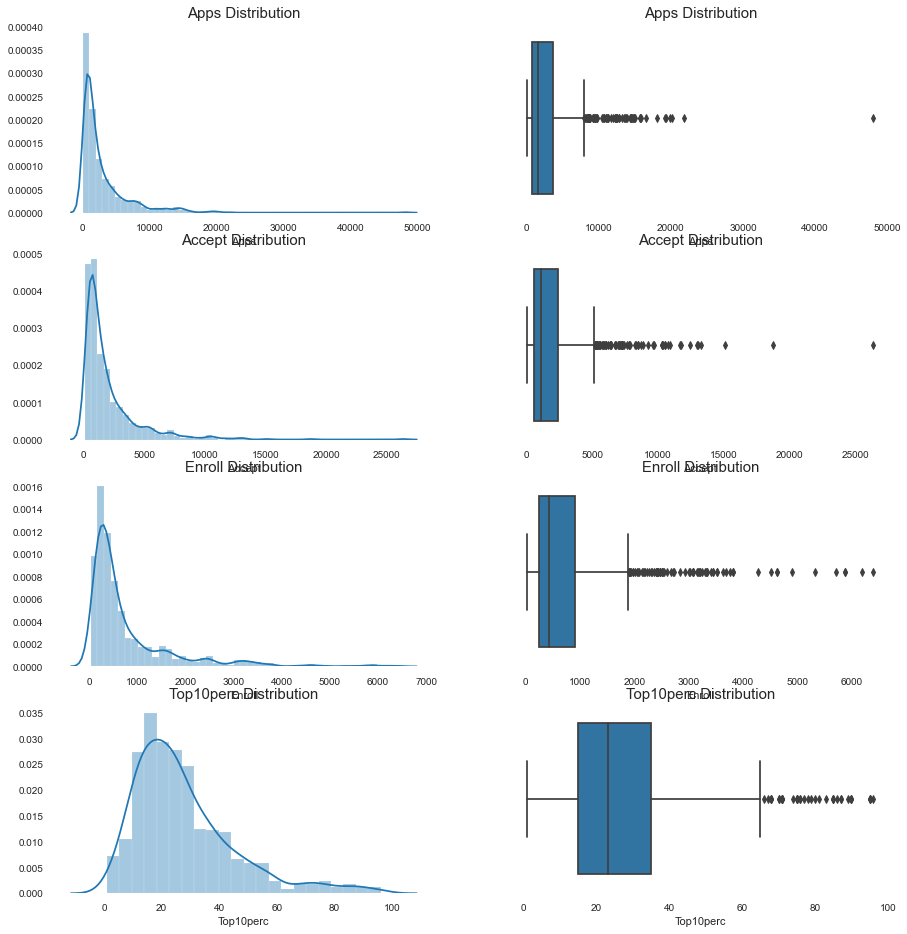

In [132]:
#univariate analysis on everything except Names - Distplot and Boxplot

fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(15, 16)
a = sns.distplot(df_ed['Apps'] , ax=axes[0][0])
a.set_title("Apps Distribution",fontsize=15)
a = sns.boxplot(df_ed['Apps'] , ax=axes[0][1])
a.set_title("Apps Distribution",fontsize=15)

a = sns.distplot(df_ed['Accept'] , ax=axes[1][0])
a.set_title("Accept Distribution",fontsize=15)

a = sns.boxplot(df_ed['Accept'] , ax=axes[1][1])
a.set_title("Accept Distribution",fontsize=15)

a = sns.distplot(df_ed['Enroll'] , ax=axes[2][0])
a.set_title("Enroll Distribution",fontsize=15)

a = sns.boxplot(df_ed['Enroll']  , ax=axes[2][1])
a.set_title("Enroll Distribution",fontsize=15)


a = sns.distplot(df_ed['Top10perc'] , ax=axes[3][0])
a.set_title("Top10perc Distribution",fontsize=15)

a = sns.boxplot(df_ed['Top10perc'] , orient = "h" , ax=axes[3][1])
a.set_title("Top10perc Distribution",fontsize=15)

plt.show()

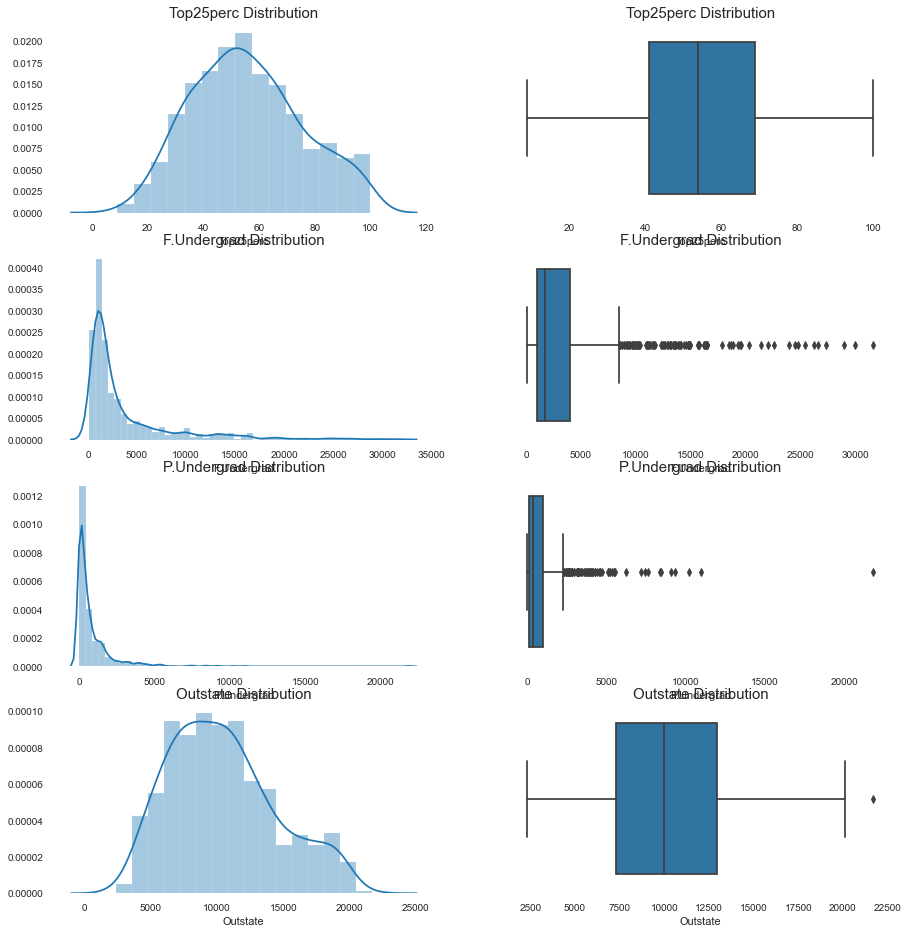

In [133]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(15, 16)
a = sns.distplot(df_ed['Top25perc'] , ax=axes[0][0])
a.set_title("Top25perc Distribution",fontsize=15)
a = sns.boxplot(df_ed['Top25perc'] , ax=axes[0][1])
a.set_title("Top25perc Distribution",fontsize=15)

a = sns.distplot(df_ed['F.Undergrad'] , ax=axes[1][0])
a.set_title("F.Undergrad Distribution",fontsize=15)

a = sns.boxplot(df_ed['F.Undergrad'] , ax=axes[1][1])
a.set_title("F.Undergrad Distribution",fontsize=15)

a = sns.distplot(df_ed['P.Undergrad'] , ax=axes[2][0])
a.set_title("P.Undergrad Distribution",fontsize=15)

a = sns.boxplot(df_ed['P.Undergrad'] , ax=axes[2][1])
a.set_title("P.Undergrad Distribution",fontsize=15)


a = sns.distplot(df_ed['Outstate'] , ax=axes[3][0])
a.set_title("Outstate Distribution",fontsize=15)

a = sns.boxplot(df_ed['Outstate'] , ax=axes[3][1])
a.set_title("Outstate Distribution",fontsize=15)

plt.show()

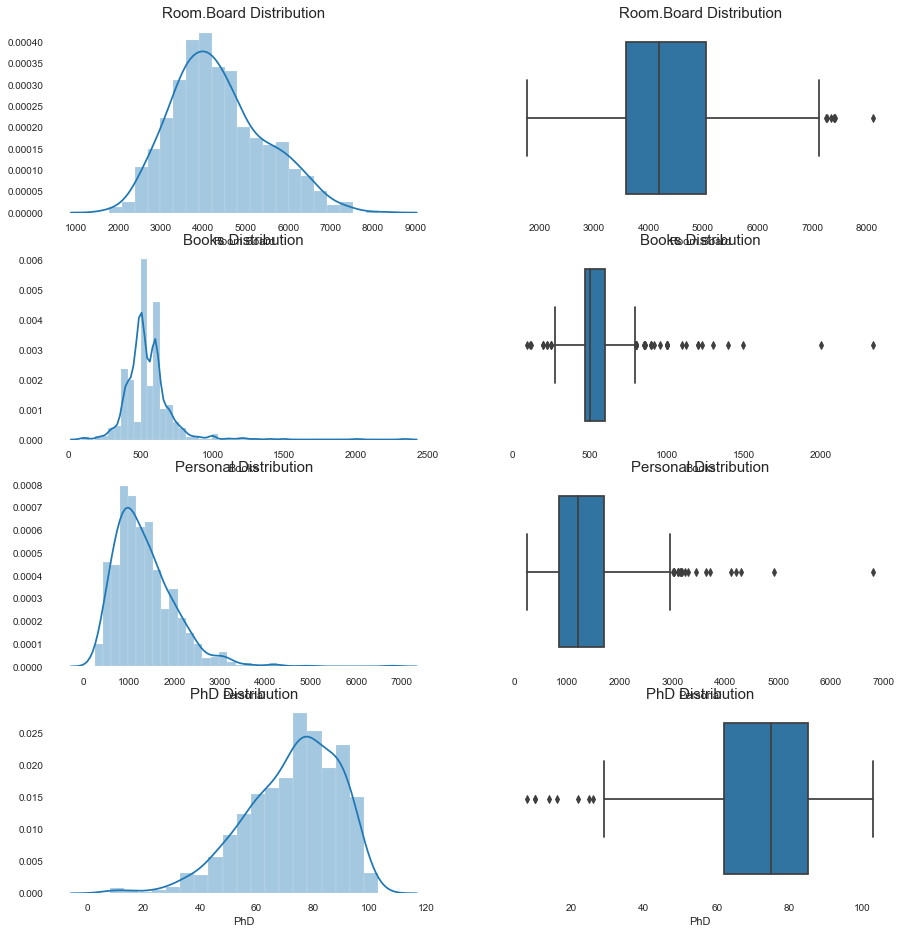

In [134]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(15, 16)
a = sns.distplot(df_ed['Room.Board'] , ax=axes[0][0])
a.set_title("Room.Board Distribution",fontsize=15)
a = sns.boxplot(df_ed['Room.Board'] , ax=axes[0][1])
a.set_title("Room.Board Distribution",fontsize=15)

a = sns.distplot(df_ed['Books'] , ax=axes[1][0])
a.set_title("Books Distribution",fontsize=15)

a = sns.boxplot(df_ed['Books'] , ax=axes[1][1])
a.set_title("Books Distribution",fontsize=15)

a = sns.distplot(df_ed['Personal'] , ax=axes[2][0])
a.set_title("Personal Distribution",fontsize=15)

a = sns.boxplot(df_ed['Personal'] , ax=axes[2][1])
a.set_title("Personal Distribution",fontsize=15)


a = sns.distplot(df_ed['PhD'] , ax=axes[3][0])
a.set_title("PhD Distribution",fontsize=15)

a = sns.boxplot(df_ed['PhD'] , ax=axes[3][1])
a.set_title("PhD Distribution",fontsize=15)

plt.show()

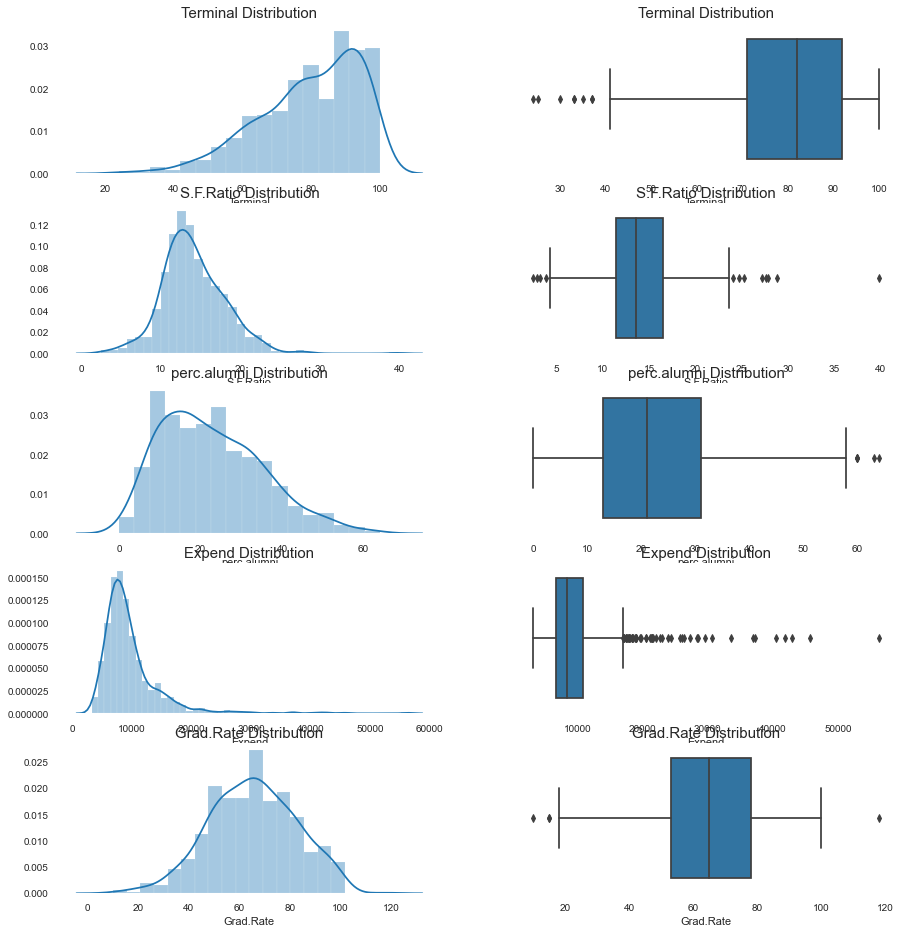

In [135]:
fig, axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(15, 16)
a = sns.distplot(df_ed['Terminal'] , ax=axes[0][0])
a.set_title("Terminal Distribution",fontsize=15)
a = sns.boxplot(df_ed['Terminal'] , ax=axes[0][1])
a.set_title("Terminal Distribution",fontsize=15)

a = sns.distplot(df_ed['S.F.Ratio'] , ax=axes[1][0])
a.set_title("S.F.Ratio Distribution",fontsize=15)

a = sns.boxplot(df_ed['S.F.Ratio'] , ax=axes[1][1])
a.set_title("S.F.Ratio Distribution",fontsize=15)

a = sns.distplot(df_ed['perc.alumni'] , ax=axes[2][0])
a.set_title("perc.alumni Distribution",fontsize=15)

a = sns.boxplot(df_ed['perc.alumni'] , ax=axes[2][1])
a.set_title("perc.alumni Distribution",fontsize=15)


a = sns.distplot(df_ed['Expend'] , ax=axes[3][0])
a.set_title("Expend Distribution",fontsize=15)

a = sns.boxplot(df_ed['Expend'] , ax=axes[3][1])
a.set_title("Expend Distribution",fontsize=15)

a = sns.distplot(df_ed['Grad.Rate'] , ax=axes[4][0])
a.set_title("Grad.Rate Distribution",fontsize=15)

a = sns.boxplot(df_ed['Grad.Rate'] , ax=axes[4][1])
a.set_title("Grad.Rate Distribution",fontsize=15)

plt.show()

In [37]:
df_ed.head(5)

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


<AxesSubplot:>

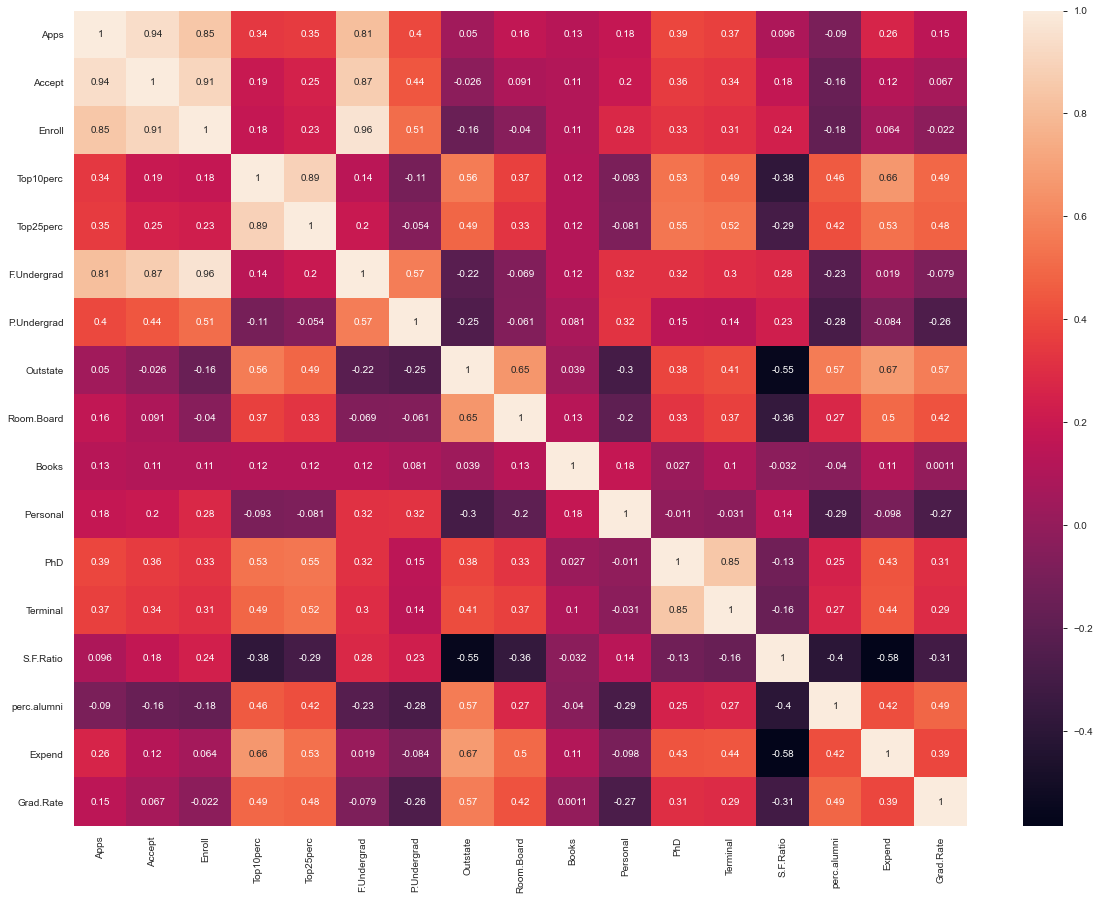

In [136]:
plt.subplots(figsize=(20,15))
sns.heatmap(df_ed_new.corr(), annot=True)  # plot the correlation coefficients as a heatmap

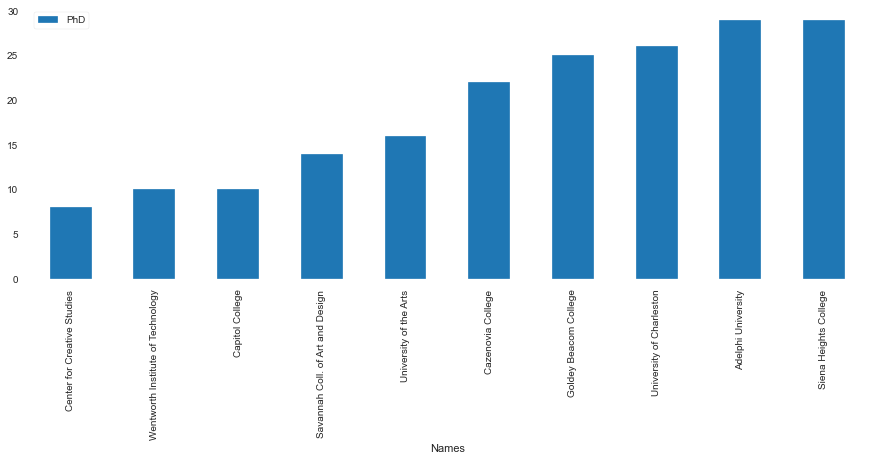

In [137]:
df_ed.groupby(by=['Names'])['PhD'].sum().reset_index().sort_values(['PhD']).head(10).plot(x='Names',
                                                                                                           y='PhD',
                                                                                                           kind='bar',
                                                                                                           figsize=(15,5))
plt.show()

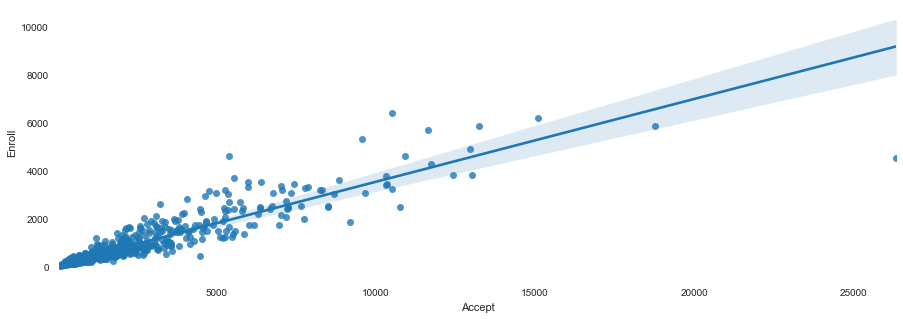

In [139]:
figure = plt.figure(figsize=(15,5))

ax = sns.regplot(x=df_ed['Accept'],y='Enroll', data=df_ed) # scatter plot

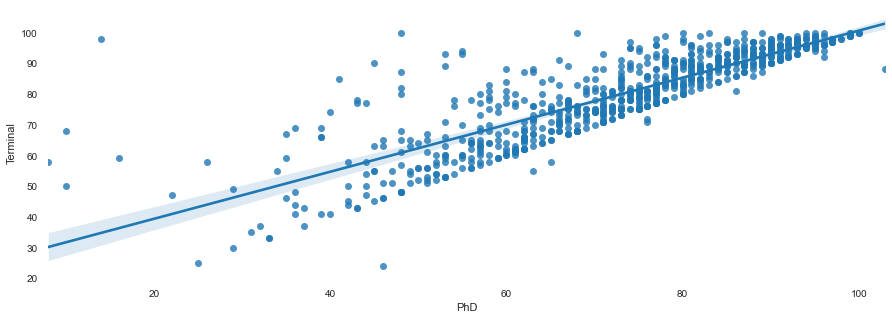

In [140]:
figure = plt.figure(figsize=(15,5))

ax = sns.regplot(x=df_ed['PhD'],y='Terminal', data=df_ed) # scatter plot

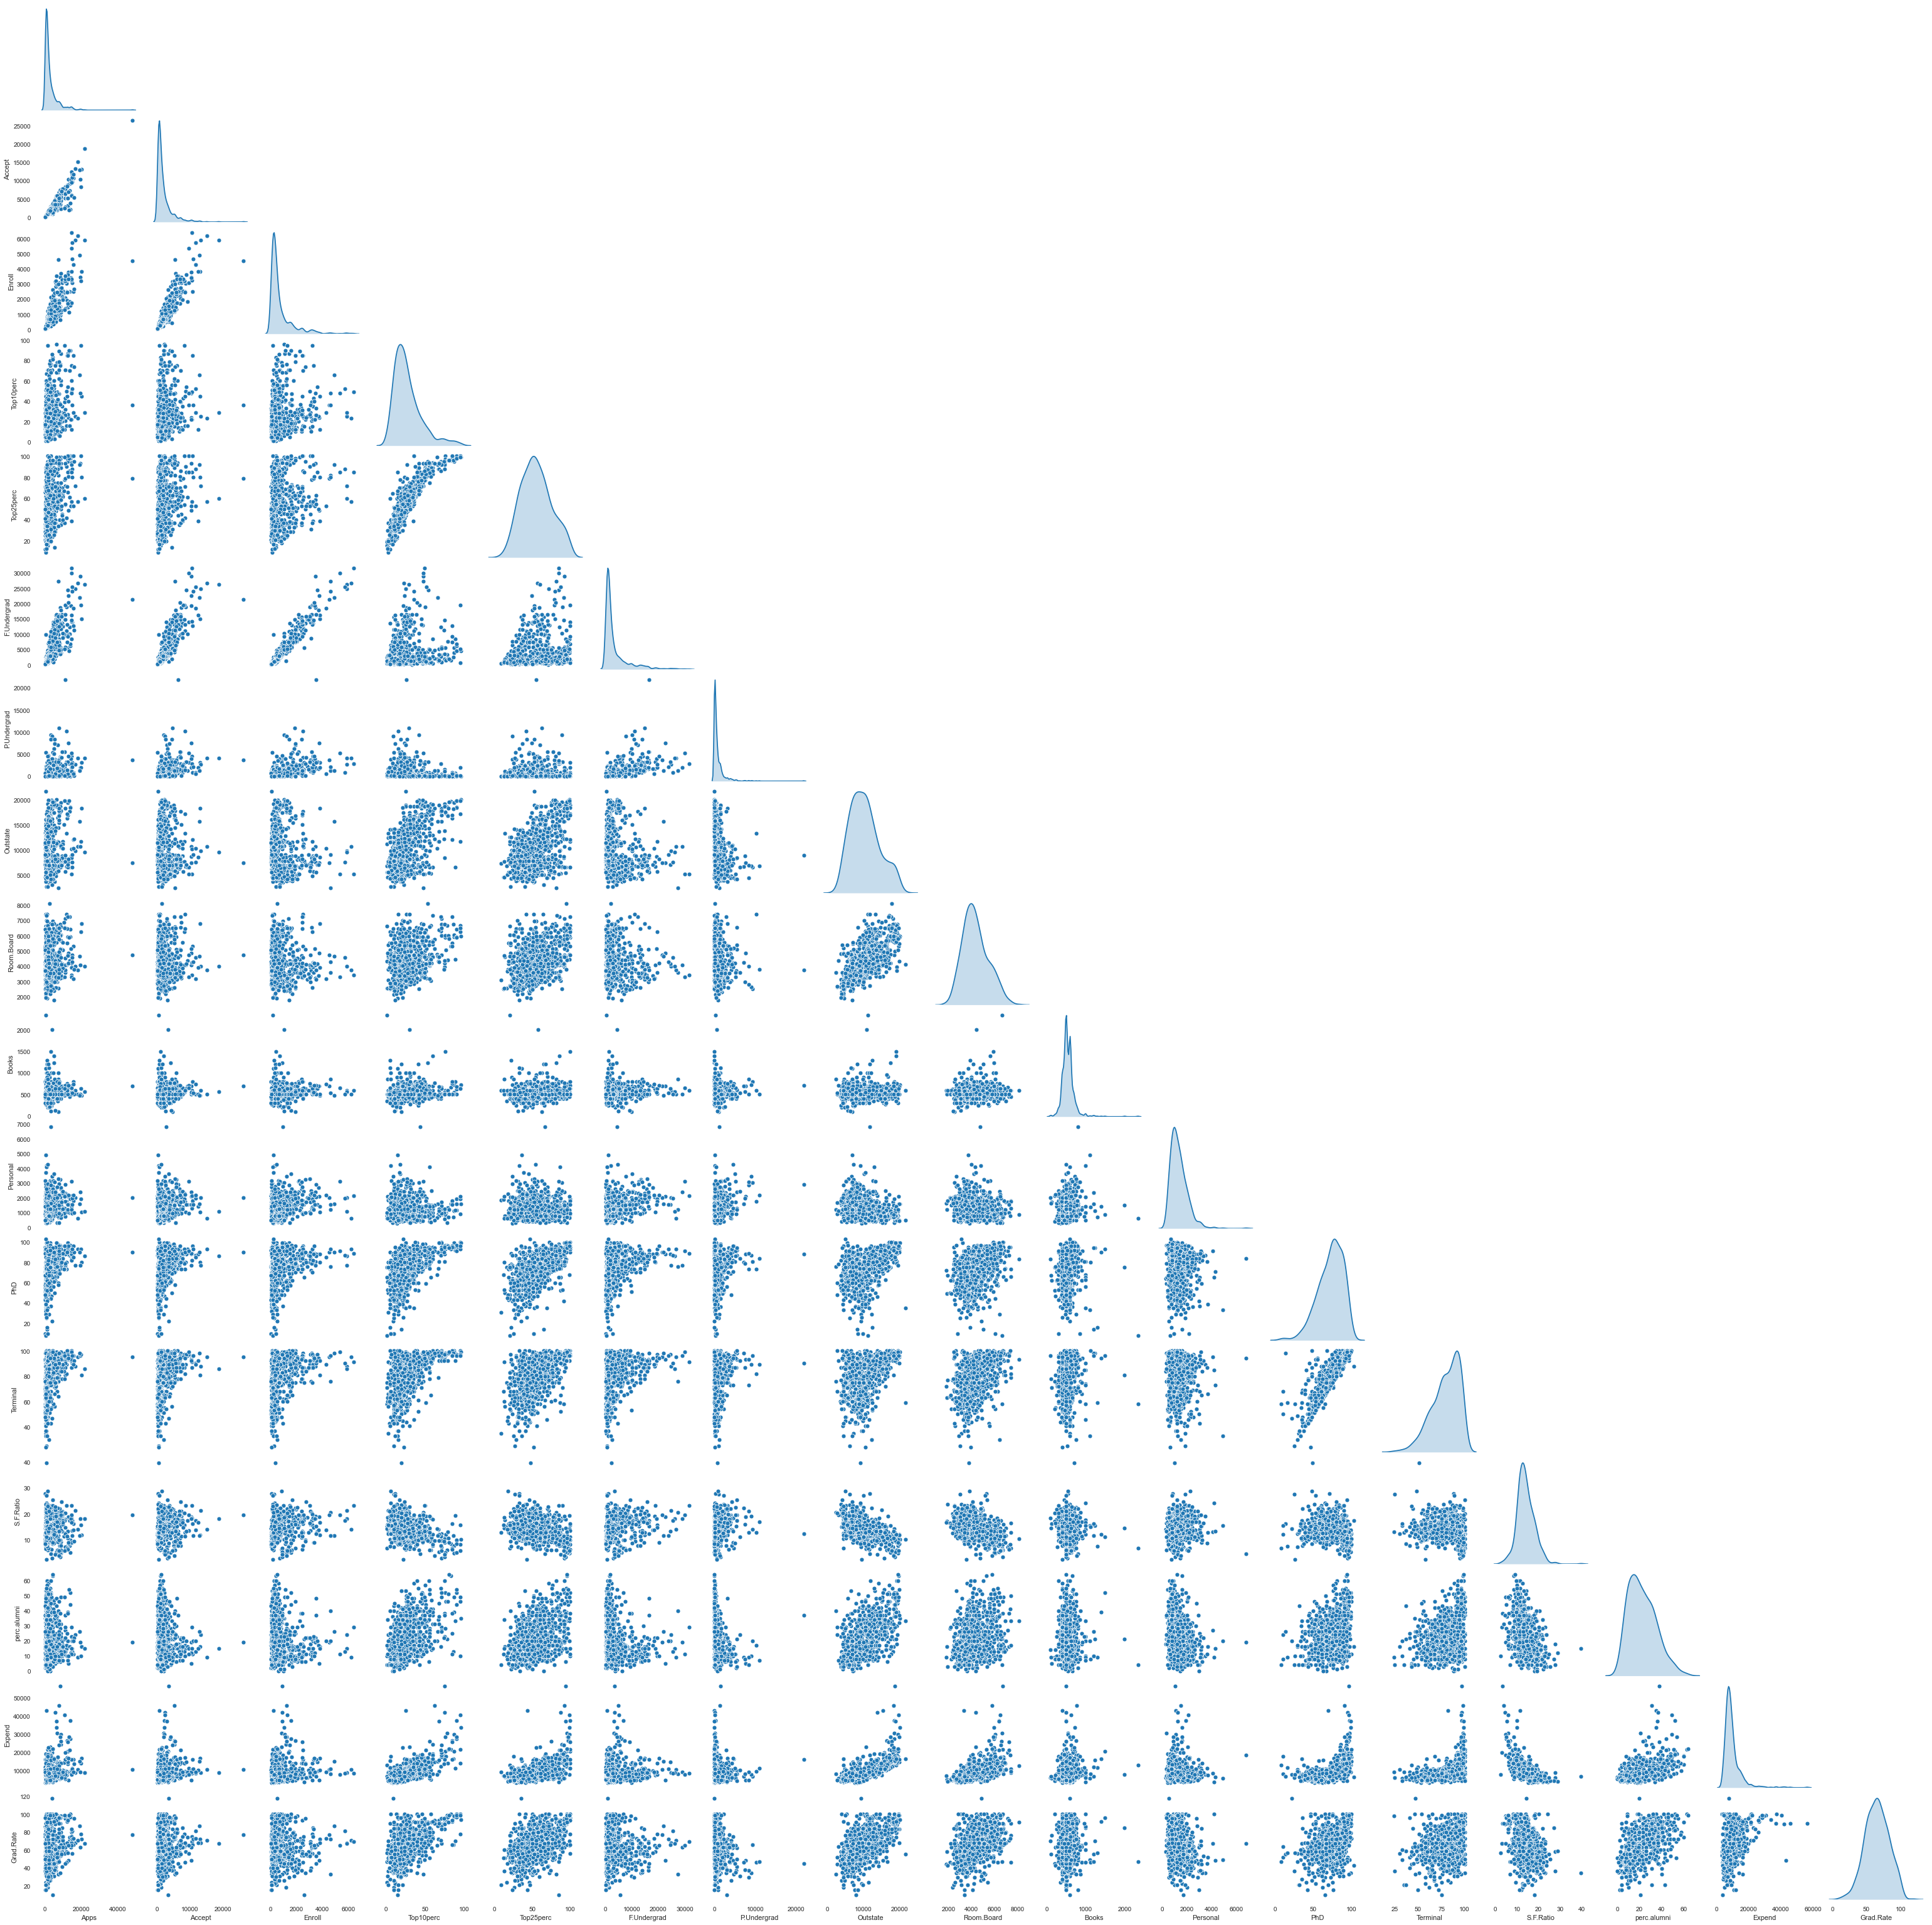

In [41]:
sns.pairplot(df_ed,diag_kind='kde',corner=True)
plt.show()

In [42]:
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(df_ed)

,Total,Percent
Grad.Rate,0,0.0
Expend,0,0.0
Apps,0,0.0
Accept,0,0.0
Enroll,0,0.0
Top10perc,0,0.0
Top25perc,0,0.0
F.Undergrad,0,0.0
P.Undergrad,0,0.0
Outstate,0,0.0


In [43]:
df_ed_new = df_ed[['Apps','Accept','Enroll','Top10perc','Top25perc','F.Undergrad','P.Undergrad','Outstate','Room.Board','Books','Personal','PhD','Terminal','S.F.Ratio','perc.alumni','Expend','Grad.Rate']]

# For the purpose of practise 3 types of scalers are used from this point

2.2) Scale the variables and write the inference for using the type of scaling function for this case study. 

In [44]:
from scipy.stats import zscore
df_ed_scaled=df_ed_new.apply(zscore)
df_ed_scaled.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,-0.346882,-0.321205,-0.063509,-0.258583,-0.191827,-0.168116,-0.209207,-0.746356,-0.964905,-0.602312,1.270045,-0.163028,-0.115729,1.013776,-0.867574,-0.501910,-0.318252
1,-0.210884,-0.038703,-0.288584,-0.655656,-1.353911,-0.209788,0.244307,0.457496,1.909208,1.215880,0.235515,-2.675646,-3.378176,-0.477704,-0.544572,0.166110,-0.551262
2,-0.406866,-0.376318,-0.478121,-0.315307,-0.292878,-0.549565,-0.497090,0.201305,-0.554317,-0.905344,-0.259582,-1.204845,-0.931341,-0.300749,0.585935,-0.177290,-0.667767
3,-0.668261,-0.681682,-0.692427,1.840231,1.677612,-0.658079,-0.520752,0.626633,0.996791,-0.602312,-0.688173,1.185206,1.175657,-1.615274,1.151188,1.792851,-0.376504
4,-0.726176,-0.764555,-0.780735,-0.655656,-0.596031,-0.711924,0.009005,-0.716508,-0.216723,1.518912,0.235515,0.204672,-0.523535,-0.553542,-1.675079,0.241803,-2.939613


In [45]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale

StandardScaler(copy=True, with_mean=True, with_std=True)

In [46]:
df_ed_std_scale = std_scale.fit_transform(df_ed_new)
df_ed_std_scale

array([[-3.46881819e-01, -3.21205453e-01, -6.35089011e-02, ...,
        -8.67574189e-01, -5.01910084e-01, -3.18251941e-01],
       [-2.10884040e-01, -3.87029908e-02, -2.88584214e-01, ...,
        -5.44572203e-01,  1.66109850e-01, -5.51261842e-01],
       [-4.06865631e-01, -3.76317928e-01, -4.78121319e-01, ...,
         5.85934748e-01, -1.77289956e-01, -6.67766793e-01],
       ...,
       [-2.33895071e-01, -4.23771558e-02, -9.15087008e-02, ...,
        -2.21570217e-01, -2.56241250e-01, -9.59029170e-01],
       [ 1.99171118e+00,  1.77256262e-01,  5.78332661e-01, ...,
         2.12019418e+00,  5.88797079e+00,  1.95359460e+00],
       [-3.26765760e-03, -6.68715889e-02, -9.58163623e-02, ...,
         4.24433755e-01, -9.87115613e-01,  1.95359460e+00]])

In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler_minmax = MinMaxScaler()
scaler_minmax.fit(df_ed_new)
df_ed_minmax_scale = scaler_minmax.transform(df_ed_new)
df_ed_minmax_scale

array([[0.03288693, 0.04417701, 0.10791254, ..., 0.1875    , 0.0726714 ,
        0.46296296],
       [0.04384229, 0.07053089, 0.07503539, ..., 0.25      , 0.13838671,
        0.42592593],
       [0.0280549 , 0.03903572, 0.04734938, ..., 0.46875   , 0.10460535,
        0.40740741],
       ...,
       [0.04198863, 0.07018813, 0.10382256, ..., 0.3125    , 0.09683865,
        0.36111111],
       [0.22127341, 0.09067713, 0.20166745, ..., 0.765625  , 0.70126492,
        0.82407407],
       [0.06056693, 0.06790312, 0.10319333, ..., 0.4375    , 0.02494015,
        0.82407407]])

In [48]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer
log_transformer = FunctionTransformer(np.log1p)
df_ed_log_scale = log_transformer.fit_transform(df_ed_new)


In [49]:
df_ed_std_scale =pd.DataFrame(df_ed_std_scale)
df_ed_std_scale.columns = ['Apps','Accept','Enroll','Top10perc','Top25perc','F.Undergrad','P.Undergrad','Outstate','Room.Board','Books','Personal','PhD','Terminal','S.F.Ratio','perc.alumni','Expend','Grad.Rate']

In [50]:
df_ed_minmax_scale = pd.DataFrame(df_ed_minmax_scale)
df_ed_minmax_scale.columns = ['Apps','Accept','Enroll','Top10perc','Top25perc','F.Undergrad','P.Undergrad','Outstate','Room.Board','Books','Personal','PhD','Terminal','S.F.Ratio','perc.alumni','Expend','Grad.Rate']

In [51]:
df_ed_log_scale =pd.DataFrame(df_ed_log_scale)
df_ed_log_scale.columns = ['Apps','Accept','Enroll','Top10perc','Top25perc','F.Undergrad','P.Undergrad','Outstate','Room.Board','Books','Personal','PhD','Terminal','S.F.Ratio','perc.alumni','Expend','Grad.Rate']

2.3) Comment on the comparison between covariance and the correlation matrix.

In [164]:
cov_matrix_std = np.cov(df_ed_std_scale_final.T)
print('Covariance Matrix \n%s', cov_matrix_std)

Covariance Matrix 
%s [[ 1.00128866  0.94466636  0.84791332  0.33927032  0.35209304  0.81554018
   0.3987775   0.05022367  0.16515151  0.13272942  0.17896117  0.39120081
   0.36996762  0.09575627 -0.09034216  0.2599265   0.14694372]
 [ 0.94466636  1.00128866  0.91281145  0.19269493  0.24779465  0.87534985
   0.44183938 -0.02578774  0.09101577  0.11367165  0.20124767  0.35621633
   0.3380184   0.17645611 -0.16019604  0.12487773  0.06739929]
 [ 0.84791332  0.91281145  1.00128866  0.18152715  0.2270373   0.96588274
   0.51372977 -0.1556777  -0.04028353  0.11285614  0.28129148  0.33189629
   0.30867133  0.23757707 -0.18102711  0.06425192 -0.02236983]
 [ 0.33927032  0.19269493  0.18152715  1.00128866  0.89314445  0.1414708
  -0.10549205  0.5630552   0.37195909  0.1190116  -0.09343665  0.53251337
   0.49176793 -0.38537048  0.45607223  0.6617651   0.49562711]
 [ 0.35209304  0.24779465  0.2270373   0.89314445  1.00128866  0.19970167
  -0.05364569  0.49002449  0.33191707  0.115676   -0.08091441

In [167]:
cor_matrix_std = df_ed_std_scale_final.corr()
print('Correlation Matrix \n%s', cor_matrix_std)

Correlation Matrix 
%s                  Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.943451  0.846822   0.338834   0.351640     0.814491   
Accept       0.943451  1.000000  0.911637   0.192447   0.247476     0.874223   
Enroll       0.846822  0.911637  1.000000   0.181294   0.226745     0.964640   
Top10perc    0.338834  0.192447  0.181294   1.000000   0.891995     0.141289   
Top25perc    0.351640  0.247476  0.226745   0.891995   1.000000     0.199445   
F.Undergrad  0.814491  0.874223  0.964640   0.141289   0.199445     1.000000   
P.Undergrad  0.398264  0.441271  0.513069  -0.105356  -0.053577     0.570512   
Outstate     0.050159 -0.025755 -0.155477   0.562331   0.489394    -0.215742   
Room.Board   0.164939  0.090899 -0.040232   0.371480   0.331490    -0.068890   
Books        0.132559  0.113525  0.112711   0.118858   0.115527     0.115550   
Personal     0.178731  0.200989  0.280929  -0.093316  -0.080810     0.317200   
PhD          0.39

2.4) Check the dataset for outliers before and after scaling. Draw your inferences from this exercise.

<AxesSubplot:>

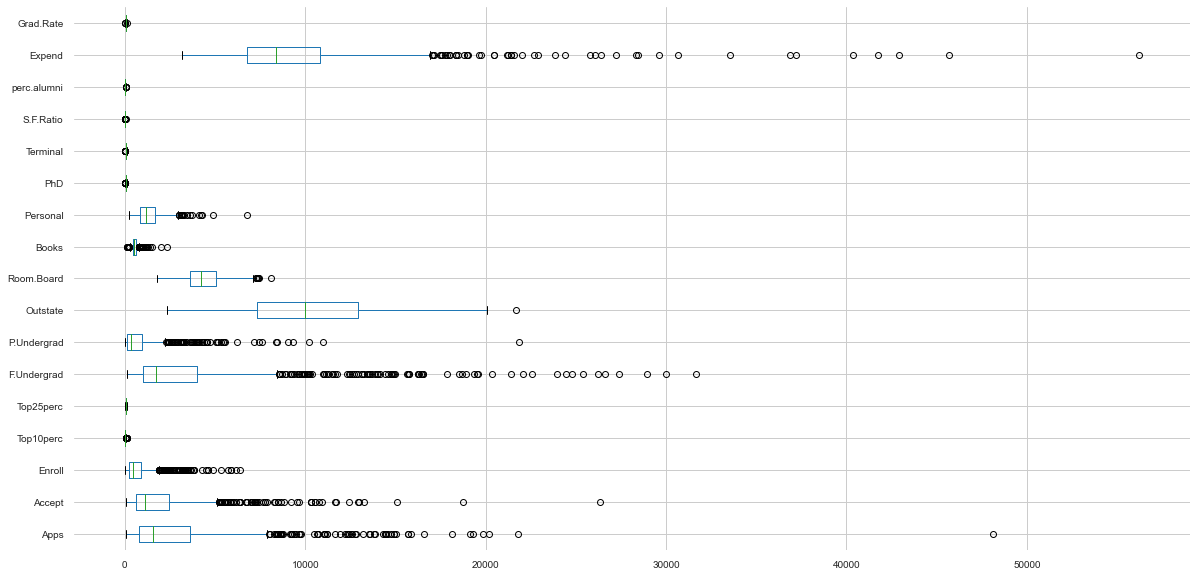

In [144]:
#before scaling
df_ed_new.boxplot(figsize=(20,10),vert=False)

<AxesSubplot:>

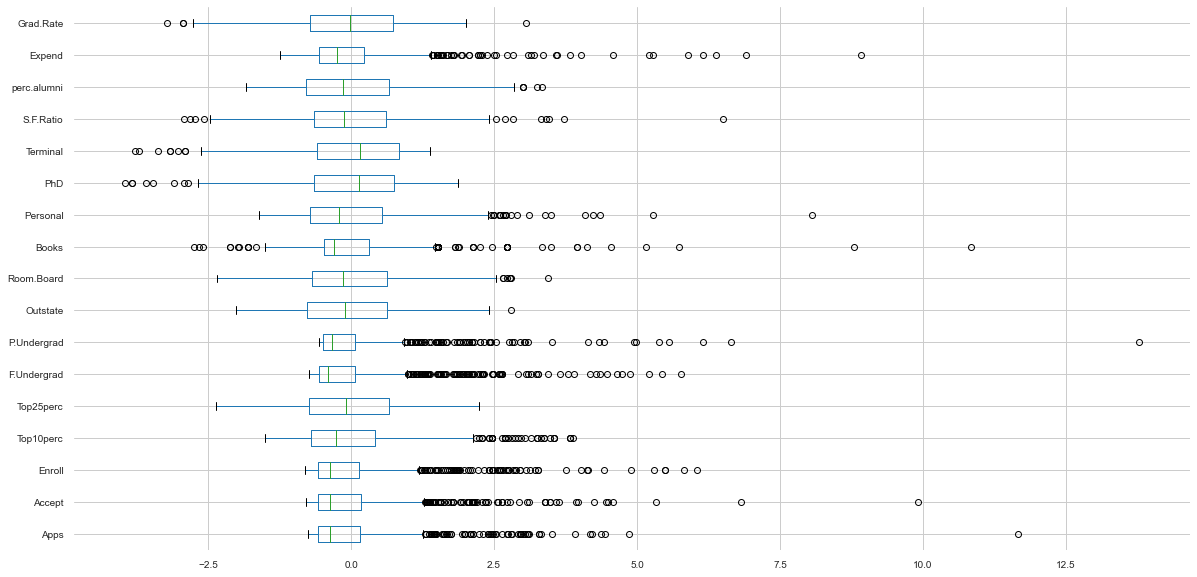

In [146]:
#after scaling
df_ed_std_scale.boxplot(figsize=(20,10),vert=False)

<AxesSubplot:>

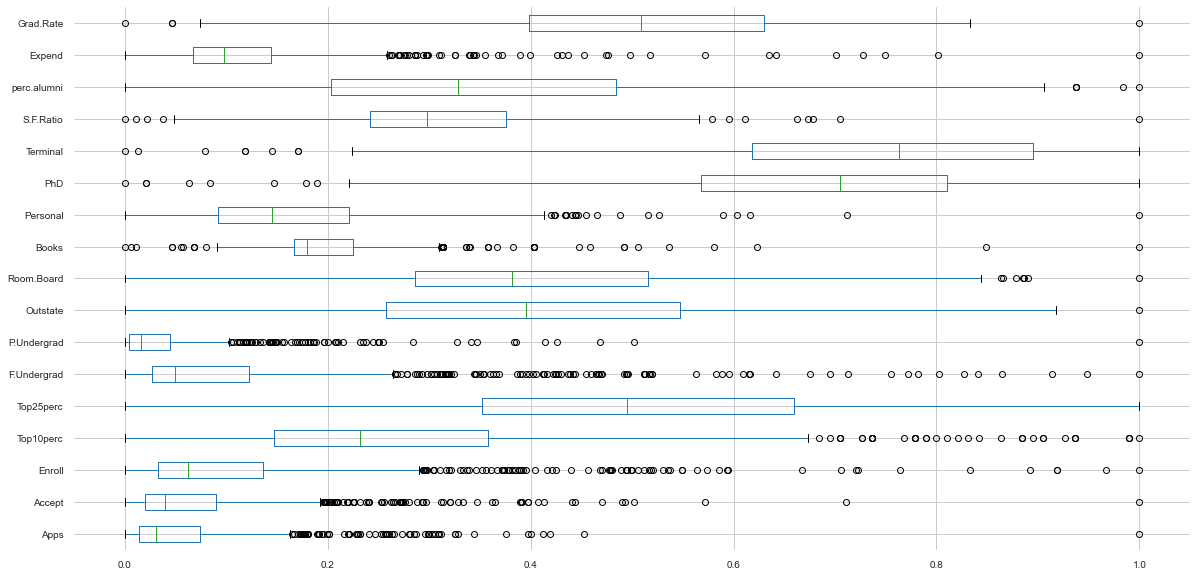

In [55]:
df_ed_minmax_scale.boxplot(figsize=(20,10),vert=False)

<AxesSubplot:>

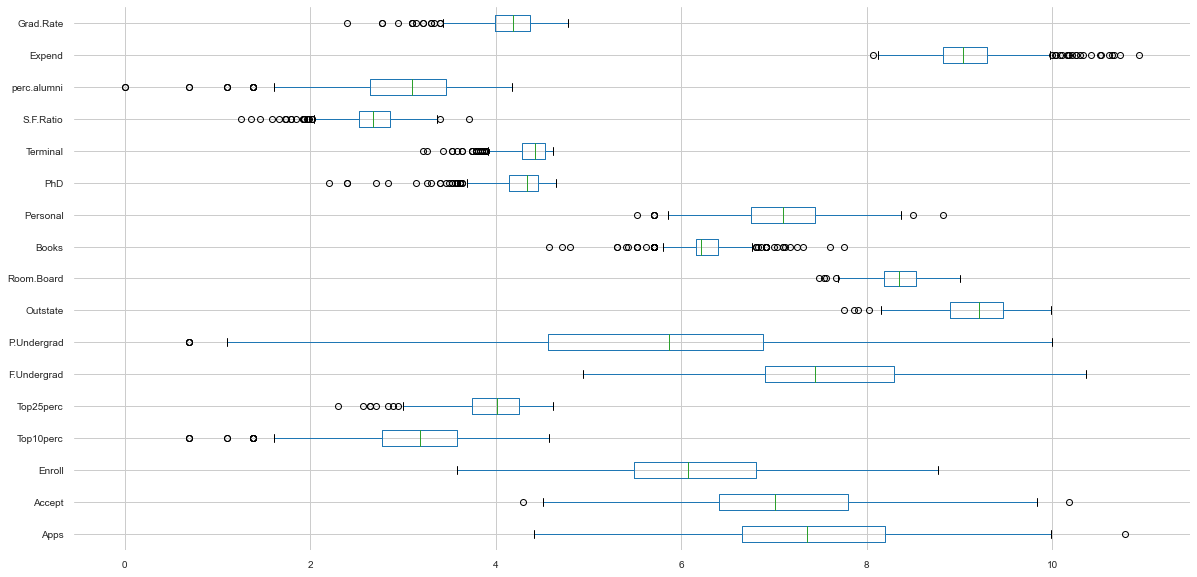

In [56]:
df_ed_log_scale.boxplot(figsize=(20,10),vert=False)

In [57]:
# def remove_outlier(col):
#     sorted(col)
#     Q1,Q3=np.percentile(col,[25,75])
#     IQR=Q3-Q1
#     lower_range= Q1-(1.5 * IQR)
#     upper_range= Q3+(1.5 * IQR)
#     return lower_range, upper_range

In [58]:
df_ed_std_scale_final = df_ed_std_scale.copy()
print(df_ed_std_scale_final.head())
df_ed_minmax_scale_final = df_ed_minmax_scale.copy()
print(df_ed_minmax_scale_final.head())
df_ed_log_scale_final = df_ed_log_scale.copy()
print(df_ed_log_scale_final.head())

       Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0 -0.346882 -0.321205 -0.063509  -0.258583  -0.191827    -0.168116   
1 -0.210884 -0.038703 -0.288584  -0.655656  -1.353911    -0.209788   
2 -0.406866 -0.376318 -0.478121  -0.315307  -0.292878    -0.549565   
3 -0.668261 -0.681682 -0.692427   1.840231   1.677612    -0.658079   
4 -0.726176 -0.764555 -0.780735  -0.655656  -0.596031    -0.711924   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0    -0.209207 -0.746356   -0.964905 -0.602312  1.270045 -0.163028 -0.115729   
1     0.244307  0.457496    1.909208  1.215880  0.235515 -2.675646 -3.378176   
2    -0.497090  0.201305   -0.554317 -0.905344 -0.259582 -1.204845 -0.931341   
3    -0.520752  0.626633    0.996791 -0.602312 -0.688173  1.185206  1.175657   
4     0.009005 -0.716508   -0.216723  1.518912  0.235515  0.204672 -0.523535   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0   1.013776    -0.867574 -0.501910  -0.318252  


In [59]:
df_ed.shape

(777, 18)

In [60]:
# lApps,uApps=remove_outlier(df_ed_std_scale_final['Apps'])
# df_ed_std_scale_final['Apps']=np.where(df_ed_std_scale_final['Apps']>uApps,uApps,df_ed_std_scale_final['Apps'])
# df_ed_std_scale_final['Apps']=np.where(df_ed_std_scale_final['Apps']<lApps,lApps,df_ed_std_scale_final['Apps'])

# lAccept,uAccept=remove_outlier(df_ed_std_scale_final['Accept'])
# df_ed_std_scale_final['Accept']=np.where(df_ed_std_scale_final['Accept']>uAccept,uAccept,df_ed_std_scale_final['Accept'])
# df_ed_std_scale_final['Accept']=np.where(df_ed_std_scale_final['Accept']<lAccept,lAccept,df_ed_std_scale_final['Accept'])

# lEnroll,uEnroll=remove_outlier(df_ed_std_scale_final['Enroll'])
# df_ed_std_scale_final['Enroll']=np.where(df_ed_std_scale_final['Enroll']>uEnroll,uEnroll,df_ed_std_scale_final['Enroll'])
# df_ed_std_scale_final['Enroll']=np.where(df_ed_std_scale_final['Enroll']<lEnroll,lEnroll,df_ed_std_scale_final['Enroll'])

# lTop10perc,uTop10perc=remove_outlier(df_ed_std_scale_final['Top10perc'])
# df_ed_std_scale_final['Top10perc']=np.where(df_ed_std_scale_final['Top10perc']>uTop10perc,uTop10perc,df_ed_std_scale_final['Top10perc'])
# df_ed_std_scale_final['Top10perc']=np.where(df_ed_std_scale_final['Top10perc']<lTop10perc,lTop10perc,df_ed_std_scale_final['Top10perc'])

# lTop25perc,uTop25perc=remove_outlier(df_ed_std_scale_final['Top25perc'])
# df_ed_std_scale_final['Top25perc']=np.where(df_ed_std_scale_final['Top25perc']>uTop25perc,uTop25perc,df_ed_std_scale_final['Top25perc'])
# df_ed_std_scale_final['Top25perc']=np.where(df_ed_std_scale_final['Top25perc']<lTop25perc,lTop25perc,df_ed_std_scale_final['Top25perc'])

# lF_Undergrad,uF_Undergrad=remove_outlier(df_ed_std_scale_final['F.Undergrad'])
# df_ed_std_scale_final['F.Undergrad']=np.where(df_ed_std_scale_final['F.Undergrad']>uF_Undergrad,uF_Undergrad,df_ed_std_scale_final['F.Undergrad'])
# df_ed_std_scale_final['F.Undergrad']=np.where(df_ed_std_scale_final['F.Undergrad']<lF_Undergrad,lF_Undergrad,df_ed_std_scale_final['F.Undergrad'])


# lP_Undergrad,uP_Undergrad=remove_outlier(df_ed_std_scale_final['P.Undergrad'])
# df_ed_std_scale_final['P.Undergrad']=np.where(df_ed_std_scale_final['P.Undergrad']>uP_Undergrad,uP_Undergrad,df_ed_std_scale_final['P.Undergrad'])
# df_ed_std_scale_final['P.Undergrad']=np.where(df_ed_std_scale_final['P.Undergrad']<lP_Undergrad,lP_Undergrad,df_ed_std_scale_final['P.Undergrad'])

# lOutstate,uOutstate=remove_outlier(df_ed_std_scale_final['Outstate'])
# df_ed_std_scale_final['Outstate']=np.where(df_ed_std_scale_final['Outstate']>uOutstate,uOutstate,df_ed_std_scale_final['Outstate'])
# df_ed_std_scale_final['Outstate']=np.where(df_ed_std_scale_final['Outstate']<lOutstate,lOutstate,df_ed_std_scale_final['Outstate'])


# lRoom_Board,uRoom_Board=remove_outlier(df_ed_std_scale_final['Room.Board'])
# df_ed_std_scale_final['Room.Board']=np.where(df_ed_std_scale_final['Room.Board']>uRoom_Board,uRoom_Board,df_ed_std_scale_final['Room.Board'])
# df_ed_std_scale_final['Room.Board']=np.where(df_ed_std_scale_final['Room.Board']<lRoom_Board,lRoom_Board,df_ed_std_scale_final['Room.Board'])


# lBooks,uBooks=remove_outlier(df_ed_std_scale_final['Books'])
# df_ed_std_scale_final['Books']=np.where(df_ed_std_scale_final['Books']>uBooks,uBooks,df_ed_std_scale_final['Books'])
# df_ed_std_scale_final['Books']=np.where(df_ed_std_scale_final['Books']<lBooks,lBooks,df_ed_std_scale_final['Books'])


# lPersonal,uPersonal=remove_outlier(df_ed_std_scale_final['Personal'])
# df_ed_std_scale_final['Personal']=np.where(df_ed_std_scale_final['Personal']>uPersonal,uPersonal,df_ed_std_scale_final['Personal'])
# df_ed_std_scale_final['Personal']=np.where(df_ed_std_scale_final['Personal']<lPersonal,lPersonal,df_ed_std_scale_final['Personal'])


# lPhD,uPhD=remove_outlier(df_ed_std_scale_final['PhD'])
# df_ed_std_scale_final['PhD']=np.where(df_ed_std_scale_final['PhD']>uPhD,uPhD,df_ed_std_scale_final['PhD'])
# df_ed_std_scale_final['PhD']=np.where(df_ed_std_scale_final['PhD']<lPhD,lPhD,df_ed_std_scale_final['PhD'])


# lTerminal,uTerminal=remove_outlier(df_ed_std_scale_final['Terminal'])
# df_ed_std_scale_final['Terminal']=np.where(df_ed_std_scale_final['Terminal']>uTerminal,uTerminal,df_ed_std_scale_final['Terminal'])
# df_ed_std_scale_final['Terminal']=np.where(df_ed_std_scale_final['Terminal']<lTerminal,lTerminal,df_ed_std_scale_final['Terminal'])


# lS_F_Ratio,uS_F_Ratio=remove_outlier(df_ed_std_scale_final['S.F.Ratio'])
# df_ed_std_scale_final['S.F.Ratio']=np.where(df_ed_std_scale_final['S.F.Ratio']>uS_F_Ratio,uS_F_Ratio,df_ed_std_scale_final['S.F.Ratio'])
# df_ed_std_scale_final['S.F.Ratio']=np.where(df_ed_std_scale_final['S.F.Ratio']<lS_F_Ratio,lS_F_Ratio,df_ed_std_scale_final['S.F.Ratio'])


# lperc_alumni,uperc_alumni=remove_outlier(df_ed_std_scale_final['perc.alumni'])
# df_ed_std_scale_final['perc.alumni']=np.where(df_ed_std_scale_final['perc.alumni']>uperc_alumni,uperc_alumni,df_ed_std_scale_final['perc.alumni'])
# df_ed_std_scale_final['perc.alumni']=np.where(df_ed_std_scale_final['perc.alumni']<lperc_alumni,lperc_alumni,df_ed_std_scale_final['perc.alumni'])


# lExpend,uExpend=remove_outlier(df_ed_std_scale_final['Expend'])
# df_ed_std_scale_final['Expend']=np.where(df_ed_std_scale_final['Expend']>uExpend,uExpend,df_ed_std_scale_final['Expend'])
# df_ed_std_scale_final['Expend']=np.where(df_ed_std_scale_final['Expend']<lExpend,lExpend,df_ed_std_scale_final['Expend'])


# lGrad_Rate,uGrad_Rate=remove_outlier(df_ed_std_scale_final['Grad.Rate'])
# df_ed_std_scale_final['Grad.Rate']=np.where(df_ed_std_scale_final['Grad.Rate']>uGrad_Rate,uGrad_Rate,df_ed_std_scale_final['Grad.Rate'])
# df_ed_std_scale_final['Grad.Rate']=np.where(df_ed_std_scale_final['Grad.Rate']<lGrad_Rate,lGrad_Rate,df_ed_std_scale_final['Grad.Rate'])


In [61]:
# lApps,uApps=remove_outlier(df_ed_minmax_scale_final['Apps'])
# df_ed_minmax_scale_final['Apps']=np.where(df_ed_minmax_scale_final['Apps']>uApps,uApps,df_ed_minmax_scale_final['Apps'])
# df_ed_minmax_scale_final['Apps']=np.where(df_ed_minmax_scale_final['Apps']<lApps,lApps,df_ed_minmax_scale_final['Apps'])

# lAccept,uAccept=remove_outlier(df_ed_minmax_scale_final['Accept'])
# df_ed_minmax_scale_final['Accept']=np.where(df_ed_minmax_scale_final['Accept']>uAccept,uAccept,df_ed_minmax_scale_final['Accept'])
# df_ed_minmax_scale_final['Accept']=np.where(df_ed_minmax_scale_final['Accept']<lAccept,lAccept,df_ed_minmax_scale_final['Accept'])

# lEnroll,uEnroll=remove_outlier(df_ed_minmax_scale_final['Enroll'])
# df_ed_minmax_scale_final['Enroll']=np.where(df_ed_minmax_scale_final['Enroll']>uEnroll,uEnroll,df_ed_minmax_scale_final['Enroll'])
# df_ed_minmax_scale_final['Enroll']=np.where(df_ed_minmax_scale_final['Enroll']<lEnroll,lEnroll,df_ed_minmax_scale_final['Enroll'])

# lTop10perc,uTop10perc=remove_outlier(df_ed_minmax_scale_final['Top10perc'])
# df_ed_minmax_scale_final['Top10perc']=np.where(df_ed_minmax_scale_final['Top10perc']>uTop10perc,uTop10perc,df_ed_minmax_scale_final['Top10perc'])
# df_ed_minmax_scale_final['Top10perc']=np.where(df_ed_minmax_scale_final['Top10perc']<lTop10perc,lTop10perc,df_ed_minmax_scale_final['Top10perc'])

# lTop25perc,uTop25perc=remove_outlier(df_ed_minmax_scale_final['Top25perc'])
# df_ed_minmax_scale_final['Top25perc']=np.where(df_ed_minmax_scale_final['Top25perc']>uTop25perc,uTop25perc,df_ed_minmax_scale_final['Top25perc'])
# df_ed_minmax_scale_final['Top25perc']=np.where(df_ed_minmax_scale_final['Top25perc']<lTop25perc,lTop25perc,df_ed_minmax_scale_final['Top25perc'])

# lF_Undergrad,uF_Undergrad=remove_outlier(df_ed_minmax_scale_final['F.Undergrad'])
# df_ed_minmax_scale_final['F.Undergrad']=np.where(df_ed_minmax_scale_final['F.Undergrad']>uF_Undergrad,uF_Undergrad,df_ed_minmax_scale_final['F.Undergrad'])
# df_ed_minmax_scale_final['F.Undergrad']=np.where(df_ed_minmax_scale_final['F.Undergrad']<lF_Undergrad,lF_Undergrad,df_ed_minmax_scale_final['F.Undergrad'])


# lP_Undergrad,uP_Undergrad=remove_outlier(df_ed_minmax_scale_final['P.Undergrad'])
# df_ed_minmax_scale_final['P.Undergrad']=np.where(df_ed_minmax_scale_final['P.Undergrad']>uP_Undergrad,uP_Undergrad,df_ed_minmax_scale_final['P.Undergrad'])
# df_ed_minmax_scale_final['P.Undergrad']=np.where(df_ed_minmax_scale_final['P.Undergrad']<lP_Undergrad,lP_Undergrad,df_ed_minmax_scale_final['P.Undergrad'])

# lOutstate,uOutstate=remove_outlier(df_ed_minmax_scale_final['Outstate'])
# df_ed_minmax_scale_final['Outstate']=np.where(df_ed_minmax_scale_final['Outstate']>uOutstate,uOutstate,df_ed_minmax_scale_final['Outstate'])
# df_ed_minmax_scale_final['Outstate']=np.where(df_ed_minmax_scale_final['Outstate']<lOutstate,lOutstate,df_ed_minmax_scale_final['Outstate'])


# lRoom_Board,uRoom_Board=remove_outlier(df_ed_minmax_scale_final['Room.Board'])
# df_ed_minmax_scale_final['Room.Board']=np.where(df_ed_minmax_scale_final['Room.Board']>uRoom_Board,uRoom_Board,df_ed_minmax_scale_final['Room.Board'])
# df_ed_minmax_scale_final['Room.Board']=np.where(df_ed_minmax_scale_final['Room.Board']<lRoom_Board,lRoom_Board,df_ed_minmax_scale_final['Room.Board'])


# lBooks,uBooks=remove_outlier(df_ed_minmax_scale_final['Books'])
# df_ed_minmax_scale_final['Books']=np.where(df_ed_minmax_scale_final['Books']>uBooks,uBooks,df_ed_minmax_scale_final['Books'])
# df_ed_minmax_scale_final['Books']=np.where(df_ed_minmax_scale_final['Books']<lBooks,lBooks,df_ed_minmax_scale_final['Books'])


# lPersonal,uPersonal=remove_outlier(df_ed_minmax_scale_final['Personal'])
# df_ed_minmax_scale_final['Personal']=np.where(df_ed_minmax_scale_final['Personal']>uPersonal,uPersonal,df_ed_minmax_scale_final['Personal'])
# df_ed_minmax_scale_final['Personal']=np.where(df_ed_minmax_scale_final['Personal']<lPersonal,lPersonal,df_ed_minmax_scale_final['Personal'])


# lPhD,uPhD=remove_outlier(df_ed_minmax_scale_final['PhD'])
# df_ed_minmax_scale_final['PhD']=np.where(df_ed_minmax_scale_final['PhD']>uPhD,uPhD,df_ed_minmax_scale_final['PhD'])
# df_ed_minmax_scale_final['PhD']=np.where(df_ed_minmax_scale_final['PhD']<lPhD,lPhD,df_ed_minmax_scale_final['PhD'])


# lTerminal,uTerminal=remove_outlier(df_ed_minmax_scale_final['Terminal'])
# df_ed_minmax_scale_final['Terminal']=np.where(df_ed_minmax_scale_final['Terminal']>uTerminal,uTerminal,df_ed_minmax_scale_final['Terminal'])
# df_ed_minmax_scale_final['Terminal']=np.where(df_ed_minmax_scale_final['Terminal']<lTerminal,lTerminal,df_ed_minmax_scale_final['Terminal'])


# lS_F_Ratio,uS_F_Ratio=remove_outlier(df_ed_minmax_scale_final['S.F.Ratio'])
# df_ed_minmax_scale_final['S.F.Ratio']=np.where(df_ed_minmax_scale_final['S.F.Ratio']>uS_F_Ratio,uS_F_Ratio,df_ed_minmax_scale_final['S.F.Ratio'])
# df_ed_minmax_scale_final['S.F.Ratio']=np.where(df_ed_minmax_scale_final['S.F.Ratio']<lS_F_Ratio,lS_F_Ratio,df_ed_minmax_scale_final['S.F.Ratio'])


# lperc_alumni,uperc_alumni=remove_outlier(df_ed_minmax_scale_final['perc.alumni'])
# df_ed_minmax_scale_final['perc.alumni']=np.where(df_ed_minmax_scale_final['perc.alumni']>uperc_alumni,uperc_alumni,df_ed_minmax_scale_final['perc.alumni'])
# df_ed_minmax_scale_final['perc.alumni']=np.where(df_ed_minmax_scale_final['perc.alumni']<lperc_alumni,lperc_alumni,df_ed_minmax_scale_final['perc.alumni'])


# lExpend,uExpend=remove_outlier(df_ed_minmax_scale_final['Expend'])
# df_ed_minmax_scale_final['Expend']=np.where(df_ed_minmax_scale_final['Expend']>uExpend,uExpend,df_ed_minmax_scale_final['Expend'])
# df_ed_minmax_scale_final['Expend']=np.where(df_ed_minmax_scale_final['Expend']<lExpend,lExpend,df_ed_minmax_scale_final['Expend'])


# lGrad_Rate,uGrad_Rate=remove_outlier(df_ed_minmax_scale_final['Grad.Rate'])
# df_ed_minmax_scale_final['Grad.Rate']=np.where(df_ed_minmax_scale_final['Grad.Rate']>uGrad_Rate,uGrad_Rate,df_ed_minmax_scale_final['Grad.Rate'])
# df_ed_minmax_scale_final['Grad.Rate']=np.where(df_ed_minmax_scale_final['Grad.Rate']<lGrad_Rate,lGrad_Rate,df_ed_minmax_scale_final['Grad.Rate'])


In [62]:
# lApps,uApps=remove_outlier(df_ed_log_scale_final['Apps'])
# df_ed_log_scale_final['Apps']=np.where(df_ed_log_scale_final['Apps']>uApps,uApps,df_ed_log_scale_final['Apps'])
# df_ed_log_scale_final['Apps']=np.where(df_ed_log_scale_final['Apps']<lApps,lApps,df_ed_log_scale_final['Apps'])

# lAccept,uAccept=remove_outlier(df_ed_log_scale_final['Accept'])
# df_ed_log_scale_final['Accept']=np.where(df_ed_log_scale_final['Accept']>uAccept,uAccept,df_ed_log_scale_final['Accept'])
# df_ed_log_scale_final['Accept']=np.where(df_ed_log_scale_final['Accept']<lAccept,lAccept,df_ed_log_scale_final['Accept'])

# lEnroll,uEnroll=remove_outlier(df_ed_log_scale_final['Enroll'])
# df_ed_log_scale_final['Enroll']=np.where(df_ed_log_scale_final['Enroll']>uEnroll,uEnroll,df_ed_log_scale_final['Enroll'])
# df_ed_log_scale_final['Enroll']=np.where(df_ed_log_scale_final['Enroll']<lEnroll,lEnroll,df_ed_log_scale_final['Enroll'])

# lTop10perc,uTop10perc=remove_outlier(df_ed_log_scale_final['Top10perc'])
# df_ed_log_scale_final['Top10perc']=np.where(df_ed_log_scale_final['Top10perc']>uTop10perc,uTop10perc,df_ed_log_scale_final['Top10perc'])
# df_ed_log_scale_final['Top10perc']=np.where(df_ed_log_scale_final['Top10perc']<lTop10perc,lTop10perc,df_ed_log_scale_final['Top10perc'])

# lTop25perc,uTop25perc=remove_outlier(df_ed_log_scale_final['Top25perc'])
# df_ed_log_scale_final['Top25perc']=np.where(df_ed_log_scale_final['Top25perc']>uTop25perc,uTop25perc,df_ed_log_scale_final['Top25perc'])
# df_ed_log_scale_final['Top25perc']=np.where(df_ed_log_scale_final['Top25perc']<lTop25perc,lTop25perc,df_ed_log_scale_final['Top25perc'])

# lF_Undergrad,uF_Undergrad=remove_outlier(df_ed_log_scale_final['F.Undergrad'])
# df_ed_log_scale_final['F.Undergrad']=np.where(df_ed_log_scale_final['F.Undergrad']>uF_Undergrad,uF_Undergrad,df_ed_log_scale_final['F.Undergrad'])
# df_ed_log_scale_final['F.Undergrad']=np.where(df_ed_log_scale_final['F.Undergrad']<lF_Undergrad,lF_Undergrad,df_ed_log_scale_final['F.Undergrad'])


# lP_Undergrad,uP_Undergrad=remove_outlier(df_ed_log_scale_final['P.Undergrad'])
# df_ed_log_scale_final['P.Undergrad']=np.where(df_ed_log_scale_final['P.Undergrad']>uP_Undergrad,uP_Undergrad,df_ed_log_scale_final['P.Undergrad'])
# df_ed_log_scale_final['P.Undergrad']=np.where(df_ed_log_scale_final['P.Undergrad']<lP_Undergrad,lP_Undergrad,df_ed_log_scale_final['P.Undergrad'])

# lOutstate,uOutstate=remove_outlier(df_ed_log_scale_final['Outstate'])
# df_ed_log_scale_final['Outstate']=np.where(df_ed_log_scale_final['Outstate']>uOutstate,uOutstate,df_ed_log_scale_final['Outstate'])
# df_ed_log_scale_final['Outstate']=np.where(df_ed_log_scale_final['Outstate']<lOutstate,lOutstate,df_ed_log_scale_final['Outstate'])


# lRoom_Board,uRoom_Board=remove_outlier(df_ed_log_scale_final['Room.Board'])
# df_ed_log_scale_final['Room.Board']=np.where(df_ed_log_scale_final['Room.Board']>uRoom_Board,uRoom_Board,df_ed_log_scale_final['Room.Board'])
# df_ed_log_scale_final['Room.Board']=np.where(df_ed_log_scale_final['Room.Board']<lRoom_Board,lRoom_Board,df_ed_log_scale_final['Room.Board'])


# lBooks,uBooks=remove_outlier(df_ed_log_scale_final['Books'])
# df_ed_log_scale_final['Books']=np.where(df_ed_log_scale_final['Books']>uBooks,uBooks,df_ed_log_scale_final['Books'])
# df_ed_log_scale_final['Books']=np.where(df_ed_log_scale_final['Books']<lBooks,lBooks,df_ed_log_scale_final['Books'])


# lPersonal,uPersonal=remove_outlier(df_ed_log_scale_final['Personal'])
# df_ed_log_scale_final['Personal']=np.where(df_ed_log_scale_final['Personal']>uPersonal,uPersonal,df_ed_log_scale_final['Personal'])
# df_ed_log_scale_final['Personal']=np.where(df_ed_log_scale_final['Personal']<lPersonal,lPersonal,df_ed_log_scale_final['Personal'])


# lPhD,uPhD=remove_outlier(df_ed_log_scale_final['PhD'])
# df_ed_log_scale_final['PhD']=np.where(df_ed_log_scale_final['PhD']>uPhD,uPhD,df_ed_log_scale_final['PhD'])
# df_ed_log_scale_final['PhD']=np.where(df_ed_log_scale_final['PhD']<lPhD,lPhD,df_ed_log_scale_final['PhD'])


# lTerminal,uTerminal=remove_outlier(df_ed_log_scale_final['Terminal'])
# df_ed_log_scale_final['Terminal']=np.where(df_ed_log_scale_final['Terminal']>uTerminal,uTerminal,df_ed_log_scale_final['Terminal'])
# df_ed_log_scale_final['Terminal']=np.where(df_ed_log_scale_final['Terminal']<lTerminal,lTerminal,df_ed_log_scale_final['Terminal'])


# lS_F_Ratio,uS_F_Ratio=remove_outlier(df_ed_log_scale_final['S.F.Ratio'])
# df_ed_log_scale_final['S.F.Ratio']=np.where(df_ed_log_scale_final['S.F.Ratio']>uS_F_Ratio,uS_F_Ratio,df_ed_log_scale_final['S.F.Ratio'])
# df_ed_log_scale_final['S.F.Ratio']=np.where(df_ed_log_scale_final['S.F.Ratio']<lS_F_Ratio,lS_F_Ratio,df_ed_log_scale_final['S.F.Ratio'])


# lperc_alumni,uperc_alumni=remove_outlier(df_ed_log_scale_final['perc.alumni'])
# df_ed_log_scale_final['perc.alumni']=np.where(df_ed_log_scale_final['perc.alumni']>uperc_alumni,uperc_alumni,df_ed_log_scale_final['perc.alumni'])
# df_ed_log_scale_final['perc.alumni']=np.where(df_ed_log_scale_final['perc.alumni']<lperc_alumni,lperc_alumni,df_ed_log_scale_final['perc.alumni'])


# lExpend,uExpend=remove_outlier(df_ed_log_scale_final['Expend'])
# df_ed_log_scale_final['Expend']=np.where(df_ed_log_scale_final['Expend']>uExpend,uExpend,df_ed_log_scale_final['Expend'])
# df_ed_log_scale_final['Expend']=np.where(df_ed_log_scale_final['Expend']<lExpend,lExpend,df_ed_log_scale_final['Expend'])


# lGrad_Rate,uGrad_Rate=remove_outlier(df_ed_log_scale_final['Grad.Rate'])
# df_ed_log_scale_final['Grad.Rate']=np.where(df_ed_log_scale_final['Grad.Rate']>uGrad_Rate,uGrad_Rate,df_ed_log_scale_final['Grad.Rate'])
# df_ed_log_scale_final['Grad.Rate']=np.where(df_ed_log_scale_final['Grad.Rate']<lGrad_Rate,lGrad_Rate,df_ed_log_scale_final['Grad.Rate'])


<AxesSubplot:>

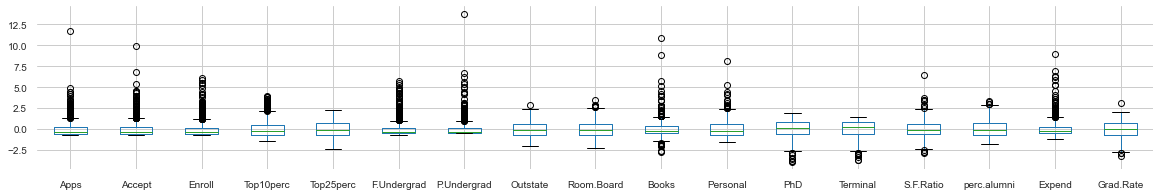

In [63]:
df_ed_std_scale_final.boxplot(figsize=(20,3))

<AxesSubplot:>

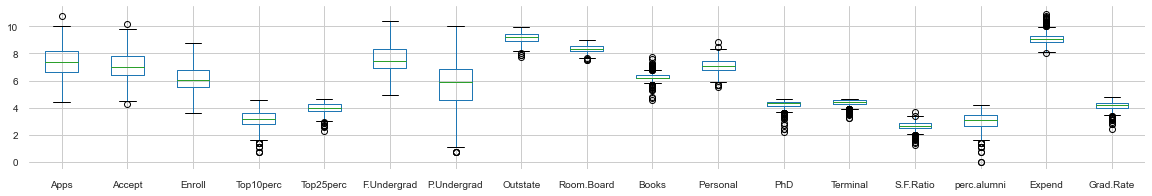

In [64]:
df_ed_log_scale_final.boxplot(figsize=(20,3))

<AxesSubplot:>

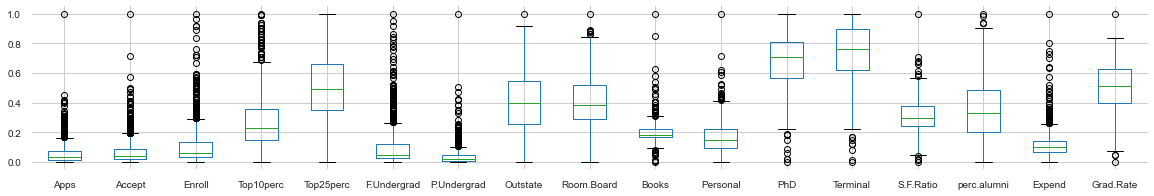

In [65]:
df_ed_minmax_scale_final.boxplot(figsize=(20,3))

In [66]:
df_ed_std_scale_final.skew()

Apps           3.723750
Accept         3.417727
Enroll         2.690465
Top10perc      1.413217
Top25perc      0.259340
F.Undergrad    2.610458
P.Undergrad    5.692353
Outstate       0.509278
Room.Board     0.477356
Books          3.485025
Personal       1.742497
PhD           -0.768170
Terminal      -0.816542
S.F.Ratio      0.667435
perc.alumni    0.606891
Expend         3.459322
Grad.Rate     -0.113777
dtype: float64

In [67]:
df_ed_log_scale_final.skew()

Apps           0.188485
Accept         0.179966
Enroll         0.373329
Top10perc     -0.433738
Top25perc     -0.668823
F.Undergrad    0.517054
P.Undergrad   -0.362271
Outstate      -0.345097
Room.Board    -0.143616
Books         -0.366866
Personal      -0.105722
PhD           -2.409729
Terminal      -1.516196
S.F.Ratio     -0.783541
perc.alumni   -0.880574
Expend         0.845072
Grad.Rate     -1.234452
dtype: float64

In [68]:
df_ed_minmax_scale_final.skew()

Apps           3.723750
Accept         3.417727
Enroll         2.690465
Top10perc      1.413217
Top25perc      0.259340
F.Undergrad    2.610458
P.Undergrad    5.692353
Outstate       0.509278
Room.Board     0.477356
Books          3.485025
Personal       1.742497
PhD           -0.768170
Terminal      -0.816542
S.F.Ratio      0.667435
perc.alumni    0.606891
Expend         3.459322
Grad.Rate     -0.113777
dtype: float64

2.5) Build the covariance matrix, eigenvalues, and eigenvector.

In [69]:
cov_matrix_minmax = np.cov(df_ed_minmax_scale_final.T)
print('Covariance Matrix \n%s', cov_matrix_minmax)

Covariance Matrix 
%s [[ 6.49754752e-03  7.09897662e-03  9.97729358e-03  5.07160301e-03
   6.16881085e-03  1.01082155e-02  2.23836423e-03  8.40176158e-04
   2.29837681e-03  7.86178125e-04  1.48924944e-03  5.41288350e-03
   5.76956340e-03  8.18065179e-04 -1.40818710e-03  2.05978922e-03
   1.88151620e-03]
 [ 7.09897662e-03  8.71372245e-03  1.24385428e-02  3.33577531e-03
   5.02762727e-03  1.25642891e-02  2.87204778e-03 -4.99576762e-04
   1.46683902e-03  7.79709881e-04  1.93939662e-03  5.70781496e-03
   6.10445229e-03  1.74575999e-03 -2.89167053e-03  1.14599927e-03
   9.99400154e-04]
 [ 9.97729358e-03  1.24385428e-02  2.13644503e-02  4.92053255e-03
   7.21294071e-03  2.17082426e-02  5.22884750e-03 -4.72236374e-03
  -1.01657007e-03  1.21213241e-03  4.24459590e-03  8.32726653e-03
   8.72864150e-03  3.68041130e-03 -5.11663763e-03  9.23271559e-04
  -5.19386586e-04]
 [ 5.07160301e-03  3.33577531e-03  4.92053255e-03  3.44800505e-02
   3.60474817e-02  4.03929114e-03 -1.36404613e-03  2.16981187e-

In [70]:
cov_matrix_std = np.cov(df_ed_std_scale_final.T)
print('Covariance Matrix \n%s', cov_matrix_std)

Covariance Matrix 
%s [[ 1.00128866  0.94466636  0.84791332  0.33927032  0.35209304  0.81554018
   0.3987775   0.05022367  0.16515151  0.13272942  0.17896117  0.39120081
   0.36996762  0.09575627 -0.09034216  0.2599265   0.14694372]
 [ 0.94466636  1.00128866  0.91281145  0.19269493  0.24779465  0.87534985
   0.44183938 -0.02578774  0.09101577  0.11367165  0.20124767  0.35621633
   0.3380184   0.17645611 -0.16019604  0.12487773  0.06739929]
 [ 0.84791332  0.91281145  1.00128866  0.18152715  0.2270373   0.96588274
   0.51372977 -0.1556777  -0.04028353  0.11285614  0.28129148  0.33189629
   0.30867133  0.23757707 -0.18102711  0.06425192 -0.02236983]
 [ 0.33927032  0.19269493  0.18152715  1.00128866  0.89314445  0.1414708
  -0.10549205  0.5630552   0.37195909  0.1190116  -0.09343665  0.53251337
   0.49176793 -0.38537048  0.45607223  0.6617651   0.49562711]
 [ 0.35209304  0.24779465  0.2270373   0.89314445  1.00128866  0.19970167
  -0.05364569  0.49002449  0.33191707  0.115676   -0.08091441

In [71]:
cov_matrix_log = np.cov(df_ed_log_scale_final.T)
print('Covariance Matrix \n%s', cov_matrix_log)

Covariance Matrix 
%s [[ 1.15083400e+00  1.03496012e+00  9.44138703e-01  2.10667929e-01
   1.49145077e-01  9.76692932e-01  6.54006458e-01  1.88970152e-02
   5.10677363e-02  4.92214081e-02  9.99774635e-02  1.37314237e-01
   1.02778840e-01  3.44809433e-02 -3.58028503e-02  1.09430886e-01
   5.78787572e-02]
 [ 1.03496012e+00  9.78004320e-01  8.91443726e-01  1.55710207e-01
   1.15406111e-01  9.19712695e-01  6.73849387e-01  1.47924981e-03
   3.32856193e-02  3.73080251e-02  9.96412121e-02  1.19991561e-01
   8.93194735e-02  4.70141421e-02 -5.06714051e-02  7.05560768e-02
   4.09245027e-02]
 [ 9.44138703e-01  8.91443726e-01  9.04537833e-01  1.30671787e-01
   9.82421510e-02  9.39109927e-01  7.53053792e-01 -5.86057746e-02
  -2.52284601e-03  3.82682320e-02  1.28288522e-01  1.02790205e-01
   7.49256540e-02  6.32822960e-02 -9.05138362e-02  2.88756561e-02
   1.52273792e-02]
 [ 2.10667929e-01  1.55710207e-01  1.30671787e-01  3.94081503e-01
   2.16401943e-01  1.09577010e-01 -2.47049964e-01  1.21473332e-

In [72]:
df_corr_std = df_ed_std_scale_final.copy()
df_corr_std.corr()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.000000,0.943451,0.846822,0.338834,0.351640,0.814491,0.398264,0.050159,0.164939,0.132559,0.178731,0.390697,0.369491,0.095633,-0.090226,0.259592,0.146755
Accept,0.943451,1.000000,0.911637,0.192447,0.247476,0.874223,0.441271,-0.025755,0.090899,0.113525,0.200989,0.355758,0.337583,0.176229,-0.159990,0.124717,0.067313
Enroll,0.846822,0.911637,1.000000,0.181294,0.226745,0.964640,0.513069,-0.155477,-0.040232,0.112711,0.280929,0.331469,0.308274,0.237271,-0.180794,0.064169,-0.022341
Top10perc,0.338834,0.192447,0.181294,1.000000,0.891995,0.141289,-0.105356,0.562331,0.371480,0.118858,-0.093316,0.531828,0.491135,-0.384875,0.455485,0.660913,0.494989
Top25perc,0.351640,0.247476,0.226745,0.891995,1.000000,0.199445,-0.053577,0.489394,0.331490,0.115527,-0.080810,0.545862,0.524749,-0.294629,0.417864,0.527447,0.477281
F.Undergrad,0.814491,0.874223,0.964640,0.141289,0.199445,1.000000,0.570512,-0.215742,-0.068890,0.115550,0.317200,0.318337,0.300019,0.279703,-0.229462,0.018652,-0.078773
P.Undergrad,0.398264,0.441271,0.513069,-0.105356,-0.053577,0.570512,1.000000,-0.253512,-0.061326,0.081200,0.319882,0.149114,0.141904,0.232531,-0.280792,-0.083568,-0.257001
Outstate,0.050159,-0.025755,-0.155477,0.562331,0.489394,-0.215742,-0.253512,1.000000,0.654256,0.038855,-0.299087,0.382982,0.407983,-0.554821,0.566262,0.672779,0.571290
Room.Board,0.164939,0.090899,-0.040232,0.371480,0.331490,-0.068890,-0.061326,0.654256,1.000000,0.127963,-0.199428,0.329202,0.374540,-0.362628,0.272363,0.501739,0.424942
Books,0.132559,0.113525,0.112711,0.118858,0.115527,0.115550,0.081200,0.038855,0.127963,1.000000,0.179295,0.026906,0.099955,-0.031929,-0.040208,0.112409,0.001061


In [73]:
df_corr_log = df_ed_log_scale_final.copy()
df_corr_log.corr()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.000000,0.975544,0.925371,0.312823,0.362959,0.886727,0.379330,0.043495,0.187728,0.169800,0.192081,0.460050,0.459050,0.116573,-0.054482,0.249690,0.183893
Accept,0.975544,1.000000,0.947786,0.250815,0.304659,0.905775,0.423969,0.003693,0.132732,0.139612,0.207662,0.436090,0.432751,0.172419,-0.083644,0.174635,0.141047
Enroll,0.925371,0.947786,1.000000,0.218865,0.269675,0.961704,0.492668,-0.152153,-0.010461,0.148907,0.278012,0.388449,0.377467,0.241321,-0.155362,0.074317,0.054571
Top10perc,0.312823,0.250815,0.218865,1.000000,0.899961,0.170006,-0.244869,0.477793,0.315374,0.109857,-0.088582,0.489167,0.444703,-0.369133,0.419325,0.591681,0.462955
Top25perc,0.362959,0.304659,0.269675,0.899961,1.000000,0.238973,-0.172975,0.415133,0.303751,0.119928,-0.072591,0.482389,0.488583,-0.281302,0.385015,0.509402,0.445768
F.Undergrad,0.886727,0.905775,0.961704,0.170006,0.238973,1.000000,0.580307,-0.211550,-0.025498,0.154465,0.306153,0.368009,0.357333,0.289586,-0.225863,0.015639,0.011458
P.Undergrad,0.379330,0.423969,0.492668,-0.244869,-0.172975,0.580307,1.000000,-0.399110,-0.079492,0.048409,0.336350,0.013178,0.015318,0.339939,-0.431948,-0.322008,-0.251778
Outstate,0.043495,0.003693,-0.152153,0.477793,0.415133,-0.211550,-0.399110,1.000000,0.660432,0.033974,-0.301964,0.262276,0.328921,-0.550781,0.521586,0.711907,0.530747
Room.Board,0.187728,0.132732,-0.010461,0.315374,0.303751,-0.025498,-0.079492,0.660432,1.000000,0.142583,-0.211887,0.254660,0.346098,-0.374431,0.269319,0.568460,0.401167
Books,0.169800,0.139612,0.148907,0.109857,0.119928,0.154465,0.048409,0.033974,0.142583,1.000000,0.184932,0.008663,0.105385,-0.044905,-0.020473,0.147929,-0.013740


In [74]:
df_corr_minmax = df_ed_minmax_scale_final.copy()
df_corr_minmax.corr()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.000000,0.943451,0.846822,0.338834,0.351640,0.814491,0.398264,0.050159,0.164939,0.132559,0.178731,0.390697,0.369491,0.095633,-0.090226,0.259592,0.146755
Accept,0.943451,1.000000,0.911637,0.192447,0.247476,0.874223,0.441271,-0.025755,0.090899,0.113525,0.200989,0.355758,0.337583,0.176229,-0.159990,0.124717,0.067313
Enroll,0.846822,0.911637,1.000000,0.181294,0.226745,0.964640,0.513069,-0.155477,-0.040232,0.112711,0.280929,0.331469,0.308274,0.237271,-0.180794,0.064169,-0.022341
Top10perc,0.338834,0.192447,0.181294,1.000000,0.891995,0.141289,-0.105356,0.562331,0.371480,0.118858,-0.093316,0.531828,0.491135,-0.384875,0.455485,0.660913,0.494989
Top25perc,0.351640,0.247476,0.226745,0.891995,1.000000,0.199445,-0.053577,0.489394,0.331490,0.115527,-0.080810,0.545862,0.524749,-0.294629,0.417864,0.527447,0.477281
F.Undergrad,0.814491,0.874223,0.964640,0.141289,0.199445,1.000000,0.570512,-0.215742,-0.068890,0.115550,0.317200,0.318337,0.300019,0.279703,-0.229462,0.018652,-0.078773
P.Undergrad,0.398264,0.441271,0.513069,-0.105356,-0.053577,0.570512,1.000000,-0.253512,-0.061326,0.081200,0.319882,0.149114,0.141904,0.232531,-0.280792,-0.083568,-0.257001
Outstate,0.050159,-0.025755,-0.155477,0.562331,0.489394,-0.215742,-0.253512,1.000000,0.654256,0.038855,-0.299087,0.382982,0.407983,-0.554821,0.566262,0.672779,0.571290
Room.Board,0.164939,0.090899,-0.040232,0.371480,0.331490,-0.068890,-0.061326,0.654256,1.000000,0.127963,-0.199428,0.329202,0.374540,-0.362628,0.272363,0.501739,0.424942
Books,0.132559,0.113525,0.112711,0.118858,0.115527,0.115550,0.081200,0.038855,0.127963,1.000000,0.179295,0.026906,0.099955,-0.031929,-0.040208,0.112409,0.001061


In [75]:
eig_vals_minmax, eig_vecs_minmax = np.linalg.eig(cov_matrix_minmax)
eig_vals_minmax

array([0.16638095, 0.07915147, 0.03180768, 0.02573551, 0.02131162,
       0.01437382, 0.01024677, 0.00897856, 0.00022908, 0.00065865,
       0.00674422, 0.00183457, 0.00246455, 0.00300555, 0.00383839,
       0.00464682, 0.00554829])

In [151]:
eig_vals_std, eig_vecs_std = np.linalg.eig(cov_matrix_std)
eig_vecs_std

array([[-2.48765602e-01,  3.31598227e-01,  6.30921033e-02,
        -2.81310530e-01,  5.74140964e-03,  1.62374420e-02,
         4.24863486e-02,  1.03090398e-01,  9.02270802e-02,
        -5.25098025e-02,  3.58970400e-01, -4.59139498e-01,
         4.30462074e-02, -1.33405806e-01,  8.06328039e-02,
        -5.95830975e-01,  2.40709086e-02],
       [-2.07601502e-01,  3.72116750e-01,  1.01249056e-01,
        -2.67817346e-01,  5.57860920e-02, -7.53468452e-03,
         1.29497196e-02,  5.62709623e-02,  1.77864814e-01,
        -4.11400844e-02, -5.43427250e-01,  5.18568789e-01,
        -5.84055850e-02,  1.45497511e-01,  3.34674281e-02,
        -2.92642398e-01, -1.45102446e-01],
       [-1.76303592e-01,  4.03724252e-01,  8.29855709e-02,
        -1.61826771e-01, -5.56936353e-02,  4.25579803e-02,
         2.76928937e-02, -5.86623552e-02,  1.28560713e-01,
        -3.44879147e-02,  6.09651110e-01,  4.04318439e-01,
        -6.93988831e-02, -2.95896092e-02, -8.56967180e-02,
         4.44638207e-01,  1.1

In [77]:
eig_vals_log, eig_vecs_log = np.linalg.eig(cov_matrix_log)
eig_vals_log

array([4.97685466, 2.00025637, 0.53124277, 0.25060991, 0.19570621,
       0.1800694 , 0.08257118, 0.07090739, 0.06078684, 0.06289374,
       0.04061046, 0.03205707, 0.01038484, 0.01554258, 0.01892824,
       0.02151432, 0.02236745])

In [169]:
eig_vals_std > 1

array([ True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [79]:
eig_vals_minmax > 1

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [80]:
eig_vals_log > 1

array([ True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

2.6) Write the explicit form of the first PC (in terms of Eigen Vectors).

Based on Eigen Vectors:

PC0 = (-0.248766 * Apps) + (-0.2076015 * Accept) + (-0.176304 * Enroll) + (-0.354274 * Top10perc) + (-0.344001 * Top25perc) + (-0.154641 * F.Undergrad) + (-0.026443 * P.Undergrad) + (-0.294736 * Outstate) + (-0.24903 * Room.Board) + (-0.064758 * Books) + (0.04253 * Personal) + (-0.318313 * PhD) + (-0.317056 * Terminal) + (0.17696 * S.F.Ratio) + (-0.205082 * perc.alumni) + (-0.318909 * Expend) + (-0.252316 * Grad.Rate)

or

Based on Dataframe from calculating PCA components(From 2.7):

PC0 = (0.248766 * Apps) + (0.2076015 * Accept) + (0.176304 * Enroll) + (0.354274 * Top10perc) + (0.344001 * Top25perc) + (0.154641 * F.Undergrad) + (0.026443 * P.Undergrad) + (0.294736 * Outstate) + (0.24903 * Room.Board) + (0.064758 * Books) + (-0.04253 * Personal) + (0.318313 * PhD) + (0.317056 * Terminal) + (-0.17696 * S.F.Ratio) + (0.205082 * perc.alumni) + (0.318909 * Expend) + (0.252316 * Grad.Rate)


2.7) Discuss the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate?
Perform PCA and export the data of the Principal Component scores into a data frame.


In [81]:
tot_std = sum(eig_vals_std)
var_exp_std = [( i /tot_std ) * 100 for i in sorted(eig_vals_std, reverse=True)]
cum_var_exp_std = np.cumsum(var_exp_std)
var_exp_std

[32.02062819886915,
 26.34021443611248,
 6.9009165542224995,
 5.922989222926291,
 5.488405110358482,
 4.98470095455744,
 3.5588714917466553,
 3.4536213369992645,
 3.1172336798217217,
 2.3751915258937992,
 1.8414263209386887,
 1.296041400123535,
 0.9857541228001165,
 0.845842335083003,
 0.517125583373192,
 0.2157540100727578,
 0.13528371610095175]

In [82]:
tot_minmax = sum(eig_vals_minmax)
var_exp_minmax = [( i /tot_minmax ) * 100 for i in sorted(eig_vals_minmax, reverse=True)]
cum_var_exp_minmax = np.cumsum(var_exp_minmax)
var_exp_minmax

[42.997328516975536,
 20.454875946022895,
 8.219963335748357,
 6.650751095367881,
 5.50749782761646,
 3.7145824401289906,
 2.648041349410547,
 2.320301836641732,
 1.7428883034631537,
 1.4338270540513085,
 1.2008630226138346,
 0.9919430338120486,
 0.7767152114250424,
 0.6369064017665996,
 0.47410114572660705,
 0.17021324172554755,
 0.05920023750344025]

In [83]:
tot_log = sum(eig_vals_log)
var_exp_log = [( i /tot_log ) * 100 for i in sorted(eig_vals_log, reverse=True)]
cum_var_exp_log = np.cumsum(var_exp_log)
var_exp_log

[58.05060678531866,
 23.331220972917937,
 6.19647696213953,
 2.9231429019608504,
 2.2827397524999906,
 2.100350228632574,
 0.9631198042135735,
 0.8270719298861336,
 0.7335998275252348,
 0.7090246775931568,
 0.4736850854073476,
 0.37391737607234765,
 0.2608965534924684,
 0.2509455027048784,
 0.22078116957907137,
 0.181290452826941,
 0.1211300172293115]

In [84]:
cum_var_exp_std

array([ 32.0206282 ,  58.36084263,  65.26175919,  71.18474841,
        76.67315352,  81.65785448,  85.21672597,  88.67034731,
        91.78758099,  94.16277251,  96.00419883,  97.30024023,
        98.28599436,  99.13183669,  99.64896227,  99.86471628,
       100.        ])

In [85]:
cum_var_exp_minmax

array([ 42.99732852,  63.45220446,  71.6721678 ,  78.32291889,
        83.83041672,  87.54499916,  90.19304051,  92.51334235,
        94.25623065,  95.69005771,  96.89092073,  97.88286376,
        98.65957897,  99.29648538,  99.77058652,  99.94079976,
       100.        ])

In [86]:
cum_var_exp_log

array([ 58.05060679,  81.38182776,  87.57830472,  90.50144762,
        92.78418737,  94.8845376 ,  95.84765741,  96.67472934,
        97.40832917,  98.11735384,  98.59103893,  98.9649563 ,
        99.22585286,  99.47679836,  99.69757953,  99.87886998,
       100.        ])

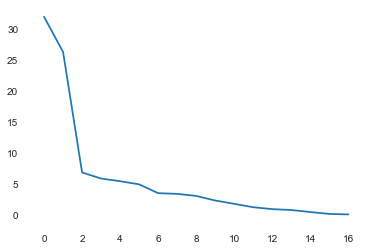

In [87]:
plt.plot(var_exp_std)

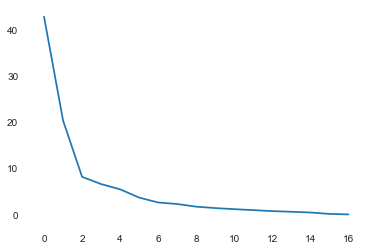

In [88]:
plt.plot(var_exp_minmax)

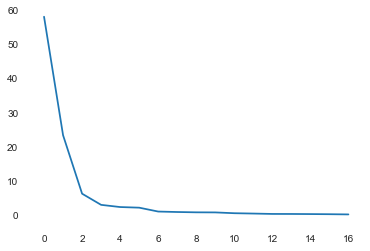

In [89]:
plt.plot(var_exp_log)

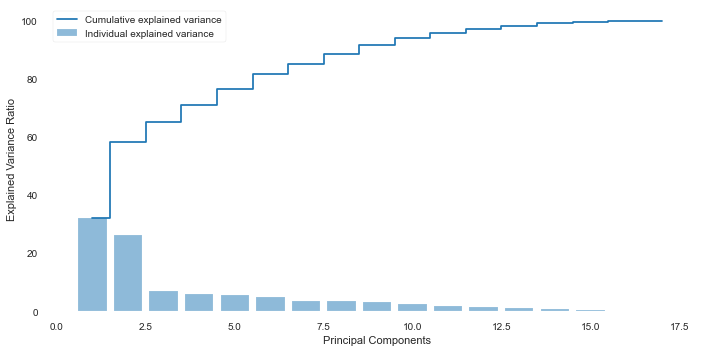

In [163]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals_std.size+1), var_exp_std, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals_std.size+1), cum_var_exp_std, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

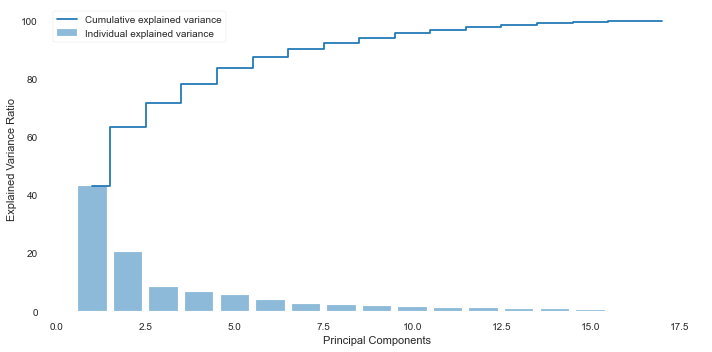

In [91]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals_minmax.size+1), var_exp_minmax, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals_minmax.size+1), cum_var_exp_minmax, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

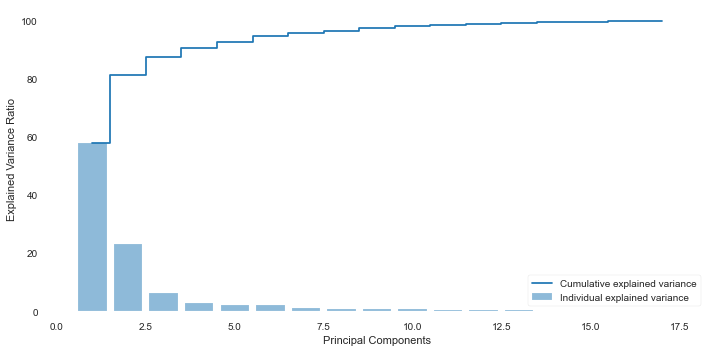

In [92]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals_log.size+1), var_exp_log, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals_log.size+1), cum_var_exp_log, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [93]:
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA

# NOTE - we are generating only 4 PCA dimensions (dimensionality reduction from 18 to 4)

pca_minmax = PCA(n_components=4)
data_reduced_minmax = pca_minmax.fit_transform(df_ed_minmax_scale_final)
data_reduced_minmax

array([[-0.25428761,  0.10818426,  0.06767298, -0.1043539 ],
       [-0.46712183, -0.37943815, -0.02657888,  0.68180314],
       [-0.18759522, -0.23060029,  0.12646798,  0.04408805],
       ...,
       [-0.12106164,  0.03255906,  0.13649053, -0.04666594],
       [ 1.26189481, -0.08952942,  0.16103671,  0.20883599],
       [-0.05161982,  0.03696949,  0.23332866, -0.08873292]])

In [153]:
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA

# NOTE - we are generating only 4 PCA dimensions (dimensionality reduction from 18 to 4)

pca_std = PCA(n_components = 6)
data_reduced_std = pca_std.fit_transform(df_ed_std_scale_final)
data_reduced_std

array([[-1.59285540e+00,  7.67333510e-01, -1.01073500e-01,
        -9.21749410e-01, -7.43975336e-01, -2.98306064e-01],
       [-2.19240180e+00, -5.78829984e-01,  2.27879804e+00,
         3.58891825e+00,  1.05999649e+00, -1.77137342e-01],
       [-1.43096371e+00, -1.09281889e+00, -4.38092810e-01,
         6.77240527e-01, -3.69613272e-01, -9.60591688e-01],
       ...,
       [-7.32560596e-01, -7.72352396e-02, -4.05685495e-04,
         5.43162945e-02, -5.16021190e-01,  4.68014227e-01],
       [ 7.91932735e+00, -2.06832886e+00,  2.07356383e+00,
         8.52053952e-01, -9.47754512e-01, -2.06993731e+00],
       [-4.69508066e-01,  3.66660943e-01, -1.32891515e+00,
        -1.08022556e-01, -1.13217594e+00,  8.39893086e-01]])

In [95]:
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA

# NOTE - we are generating only 4 PCA dimensions (dimensionality reduction from 18 to 4)

pca_log = PCA(n_components=4)
data_reduced_log = pca_log.fit_transform(df_ed_log_scale_final)
data_reduced_log

array([[-0.724207  ,  0.53019874,  0.33729812, -0.61202005],
       [-1.1414076 ,  1.00506074, -0.13442455,  0.41926246],
       [ 1.22777356, -0.54423639,  0.18889429,  0.24815393],
       ...,
       [-0.21626083, -0.81253486,  0.32484392, -0.06185081],
       [-1.10595194, -3.29455275, -0.95500581, -0.50288925],
       [-1.69636394,  0.80078472, -0.50649289,  0.09071295]])

In [96]:
df_std = pd.DataFrame(data_reduced_std)
df_std.columns = df_std.columns+1
df_std.index = df_std.index+1 
df_std

,1,2,3,4
1,-1.592855,0.767334,-0.101075,-0.921749
2,-2.192402,-0.578830,2.278797,3.588919
3,-1.430964,-1.092819,-0.438093,0.677241
4,2.855557,-2.630612,0.141727,-1.295487
5,-2.212008,0.021631,2.387053,-1.114545
...,...,...,...,...
773,-3.328458,1.220255,-0.383388,0.108555
774,0.199389,-0.686689,0.051561,0.562270
775,-0.732561,-0.077235,-0.000410,0.054318
776,7.919327,-2.068329,2.073540,0.852060


In [97]:
df_minmax = pd.DataFrame(data_reduced_minmax)
df_minmax.columns = df_minmax.columns+1
df_minmax.index = df_minmax.index+1 
df_minmax

,1,2,3,4
1,-0.254288,0.108184,0.067673,-0.104354
2,-0.467122,-0.379438,-0.026579,0.681803
3,-0.187595,-0.230600,0.126468,0.044088
4,0.620420,-0.129399,0.084277,-0.193353
5,-0.419202,0.030048,-0.128779,-0.129416
...,...,...,...,...
773,-0.611551,-0.008951,-0.078474,0.033746
774,0.045157,-0.146910,-0.063816,0.083482
775,-0.121062,0.032559,0.136491,-0.046666
776,1.261895,-0.089529,0.161037,0.208836


In [98]:
df_log = pd.DataFrame(data_reduced_log)
df_log.columns = df_log.columns+1
df_log.index = df_log.index+1 
df_log

,1,2,3,4
1,-0.724207,0.530199,0.337298,-0.612020
2,-1.141408,1.005061,-0.134425,0.419262
3,1.227774,-0.544236,0.188894,0.248154
4,3.097649,-0.572715,-1.294059,-0.491623
5,2.745083,3.511562,-0.347571,-1.249493
...,...,...,...,...
773,-1.469025,2.019677,0.764548,0.946031
774,-1.178042,0.447378,-0.738038,0.346276
775,-0.216261,-0.812535,0.324844,-0.061851
776,-1.105952,-3.294553,-0.955006,-0.502889


<AxesSubplot:>

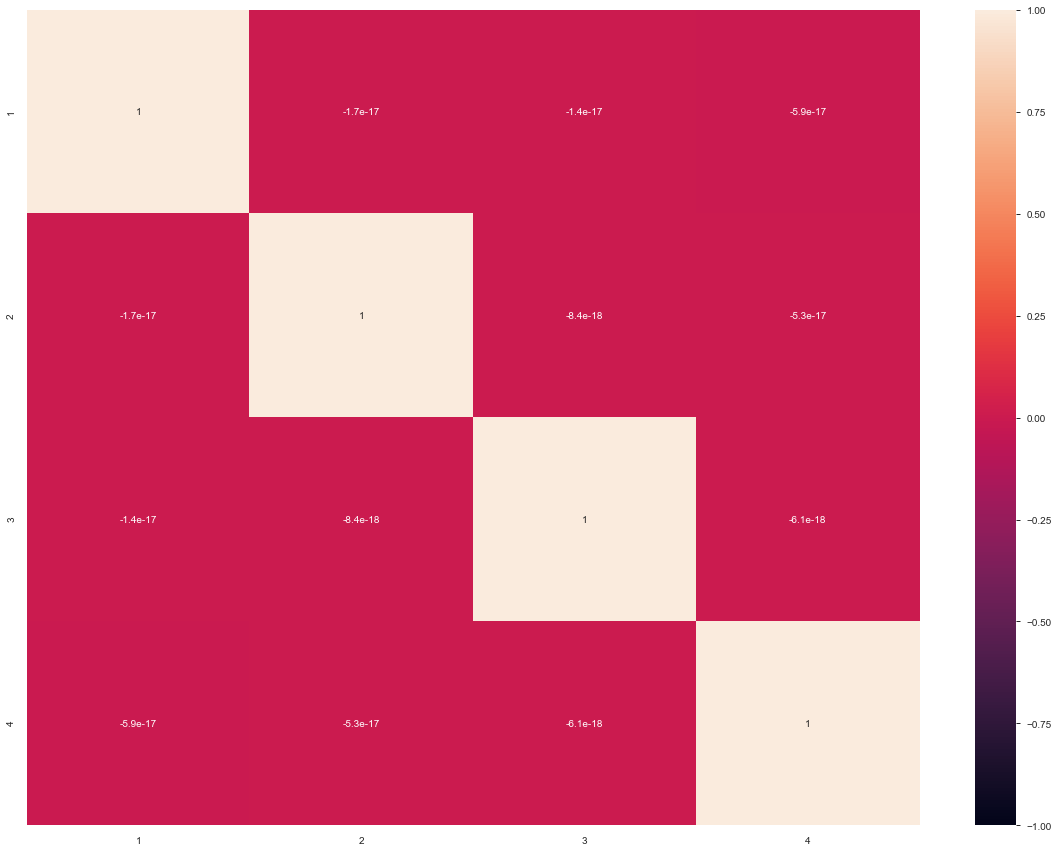

In [99]:
plt.subplots(figsize=(20,15))
sns.heatmap(df_minmax.corr(), annot=True,vmin=-1,vmax=+1)

<AxesSubplot:>

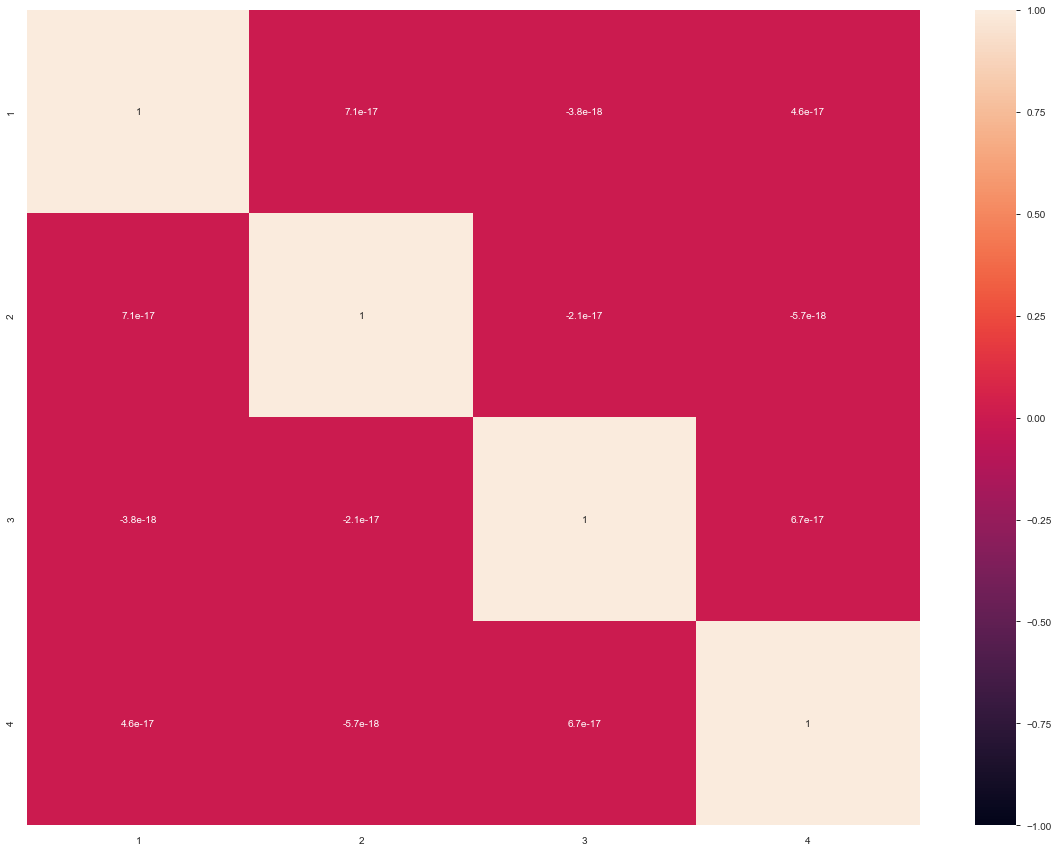

In [100]:
plt.subplots(figsize=(20,15))
sns.heatmap(df_std.corr(), annot=True,vmin=-1,vmax=+1)

<AxesSubplot:>

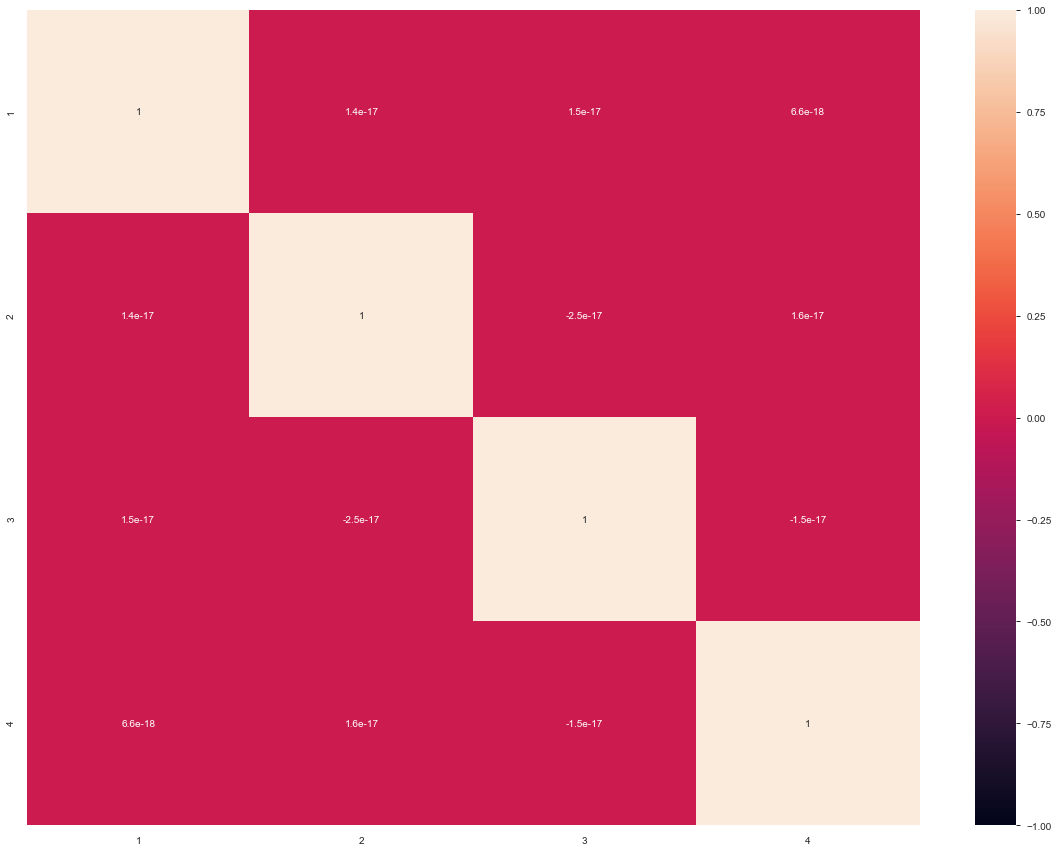

In [101]:
plt.subplots(figsize=(20,15))
sns.heatmap(df_log.corr(), annot=True,vmin=-1,vmax=+1)

In [157]:
pca_std.components_

array([[ 0.2487656 ,  0.2076015 ,  0.17630359,  0.35427395,  0.34400128,
         0.15464096,  0.0264425 ,  0.29473642,  0.24903045,  0.06475752,
        -0.04252854,  0.31831287,  0.31705602, -0.17695789,  0.20508237,
         0.31890875,  0.25231565],
       [ 0.33159823,  0.37211675,  0.40372425, -0.08241182, -0.04477866,
         0.41767377,  0.31508783, -0.24964352, -0.13780888,  0.05634184,
         0.21992922,  0.05831132,  0.04642945,  0.24666528, -0.24659527,
        -0.13168986, -0.16924053],
       [-0.0630921 , -0.10124906, -0.08298557,  0.03505553, -0.02414794,
        -0.06139298,  0.13968172,  0.04659887,  0.14896739,  0.67741165,
         0.49972112, -0.12702837, -0.06603755, -0.2898484 , -0.14698927,
         0.22674398, -0.20806465],
       [ 0.28131053,  0.26781735,  0.16182677, -0.05154725, -0.10976654,
         0.10041234, -0.15855849,  0.13129136,  0.18499599,  0.08708922,
        -0.23071057, -0.53472483, -0.51944302, -0.16118949,  0.01731422,
         0.07927349

In [103]:
pca_minmax.components_

array([[ 0.06846224,  0.05452269,  0.05956194,  0.39233522,  0.45004085,
         0.04410639, -0.01684897,  0.40071798,  0.25751256,  0.01786596,
        -0.04978727,  0.30045752,  0.34070493, -0.12128574,  0.2904684 ,
         0.17571605,  0.25318216],
       [ 0.21376709,  0.26763432,  0.46206282,  0.04829768,  0.12225151,
         0.50082689,  0.14569554, -0.29921967, -0.12689517,  0.03136326,
         0.14840781,  0.23673873,  0.24825681,  0.1536483 , -0.29983229,
        -0.03566349, -0.13689963],
       [-0.00304964, -0.03363258,  0.03043732,  0.38622802,  0.50099954,
         0.0259169 , -0.05678654, -0.26551958, -0.48509082, -0.00554375,
         0.03318757, -0.27398637, -0.39716006,  0.0138465 ,  0.22161186,
        -0.03459703,  0.06010876],
       [ 0.18673353,  0.21057051,  0.26136526,  0.0374805 , -0.02868088,
         0.24056226,  0.03874787,  0.27047013,  0.43482605,  0.05984328,
         0.0141733 , -0.42674297, -0.49275935, -0.07437856, -0.19548123,
         0.09306587

In [104]:
pca_log.components_

array([[-0.41715285, -0.3958318 , -0.39424663, -0.02162763, -0.02563686,
        -0.43629638, -0.55150071,  0.04330702, -0.00123563, -0.01698208,
        -0.07437094, -0.03958563, -0.02910551, -0.03756459,  0.08136707,
         0.00809561,  0.00546534],
       [-0.34686323, -0.28174371, -0.20606346, -0.29798198, -0.17121043,
        -0.1411965 ,  0.69243795, -0.15368757, -0.05575318, -0.01914529,
         0.06770196, -0.09084031, -0.06802458,  0.06356802, -0.21969954,
        -0.18133908, -0.10286333],
       [ 0.0637631 ,  0.11187947,  0.17561924, -0.46944491, -0.26742229,
         0.15974632, -0.45277828, -0.29046261, -0.1686505 , -0.0097332 ,
         0.11234348, -0.09978878, -0.08303668,  0.16838712, -0.41102621,
        -0.25663401, -0.15689769],
       [ 0.16461573,  0.20163503, -0.04247683, -0.53077806, -0.29524679,
        -0.13460857,  0.05705069,  0.18018513,  0.1225902 , -0.09843738,
        -0.55689649, -0.04636653, -0.00581873,  0.0074437 ,  0.39886375,
        -0.01003927

In [160]:
pca_std.explained_variance_ratio_

array([0.32020628, 0.26340214, 0.06900917, 0.05922989, 0.05488405,
       0.04984701])

In [106]:
pca_minmax.explained_variance_ratio_

array([0.42997329, 0.20454876, 0.08219963, 0.06650751])

In [107]:
pca_log.explained_variance_ratio_

array([0.58050607, 0.23331221, 0.06196477, 0.02923143])

In [156]:
var_std=np.cumsum(np.round(pca_std.explained_variance_ratio_, decimals=3)*100)
var_std #cumulative sum of variance explained with [n] features

array([32. , 58.3, 65.2, 71.1, 76.6, 81.6])

In [109]:
var_minmax=np.cumsum(np.round(pca_minmax.explained_variance_ratio_, decimals=3)*100)
var_minmax

array([43. , 63.5, 71.7, 78.4])

In [110]:
var_log=np.cumsum(np.round(pca_log.explained_variance_ratio_, decimals=3)*100)
var_log

array([58.1, 81.4, 87.6, 90.5])

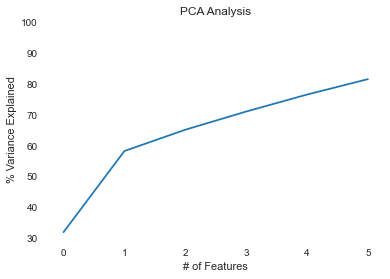

In [161]:
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')
plt.plot(var_std)

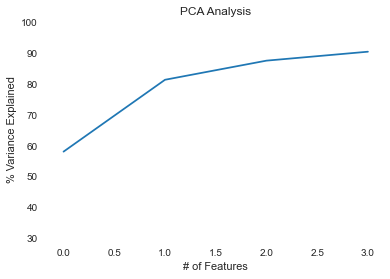

In [112]:
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')
plt.plot(var_log)

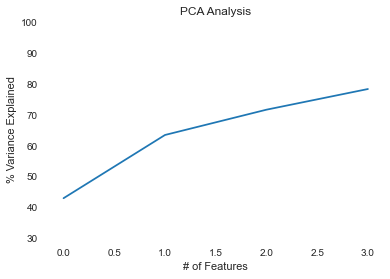

In [113]:
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')
plt.plot(var_minmax)

In [159]:
df_comp_std = pd.DataFrame(pca_std.components_,columns=list(df_ed_std_scale_final))
df_comp_std.head(10)

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,0.248766,0.207602,0.176304,0.354274,0.344001,0.154641,0.026443,0.294736,0.249030,0.064758,-0.042529,0.318313,0.317056,-0.176958,0.205082,0.318909,0.252316
1,0.331598,0.372117,0.403724,-0.082412,-0.044779,0.417674,0.315088,-0.249644,-0.137809,0.056342,0.219929,0.058311,0.046429,0.246665,-0.246595,-0.131690,-0.169241
2,-0.063092,-0.101249,-0.082986,0.035056,-0.024148,-0.061393,0.139682,0.046599,0.148967,0.677412,0.499721,-0.127028,-0.066038,-0.289848,-0.146989,0.226744,-0.208065
3,0.281311,0.267817,0.161827,-0.051547,-0.109767,0.100412,-0.158558,0.131291,0.184996,0.087089,-0.230711,-0.534725,-0.519443,-0.161189,0.017314,0.079273,0.269129
4,0.005741,0.055786,-0.055694,-0.395434,-0.426534,-0.043454,0.302385,0.222532,0.560919,-0.127289,-0.222311,0.140166,0.204720,-0.079388,-0.216297,0.075958,-0.109268
5,-0.016237,0.007535,-0.042558,-0.052693,0.033092,-0.043454,-0.191199,-0.030000,0.162755,0.641055,-0.331398,0.091256,0.154928,0.487046,-0.047340,-0.298119,0.216163


In [121]:
df_comp_std.to_csv(r'C:\Users\z024333\pca_std_scaled.csv',index=False,header=True)

In [115]:
df_comp_minmax = pd.DataFrame(pca_minmax.components_,columns=list(df_ed_minmax_scale_final))
df_comp_minmax.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,0.068462,0.054523,0.059562,0.392335,0.450041,0.044106,-0.016849,0.400718,0.257513,0.017866,-0.049787,0.300458,0.340705,-0.121286,0.290468,0.175716,0.253182
1,0.213767,0.267634,0.462063,0.048298,0.122252,0.500827,0.145696,-0.299220,-0.126895,0.031363,0.148408,0.236739,0.248257,0.153648,-0.299832,-0.035663,-0.136900
2,-0.003050,-0.033633,0.030437,0.386228,0.501000,0.025917,-0.056787,-0.265520,-0.485091,-0.005544,0.033188,-0.273986,-0.397160,0.013846,0.221612,-0.034597,0.060109
3,0.186734,0.210571,0.261365,0.037481,-0.028681,0.240562,0.038748,0.270470,0.434826,0.059843,0.014173,-0.426743,-0.492759,-0.074379,-0.195481,0.093066,0.218042


In [116]:
df_comp_log = pd.DataFrame(pca_log.components_,columns=list(df_ed_log_scale_final))
df_comp_log.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,-0.417153,-0.395832,-0.394247,-0.021628,-0.025637,-0.436296,-0.551501,0.043307,-0.001236,-0.016982,-0.074371,-0.039586,-0.029106,-0.037565,0.081367,0.008096,0.005465
1,-0.346863,-0.281744,-0.206063,-0.297982,-0.171210,-0.141196,0.692438,-0.153688,-0.055753,-0.019145,0.067702,-0.090840,-0.068025,0.063568,-0.219700,-0.181339,-0.102863
2,0.063763,0.111879,0.175619,-0.469445,-0.267422,0.159746,-0.452778,-0.290463,-0.168650,-0.009733,0.112343,-0.099789,-0.083037,0.168387,-0.411026,-0.256634,-0.156898
3,0.164616,0.201635,-0.042477,-0.530778,-0.295247,-0.134609,0.057051,0.180185,0.122590,-0.098437,-0.556896,-0.046367,-0.005819,0.007444,0.398864,-0.010039,0.106862


2.8) Mention the business implication of using the Principal Component Analysis for this case study. [Hint: Write Interpretations of the Principal Components Obtained]

<AxesSubplot:>

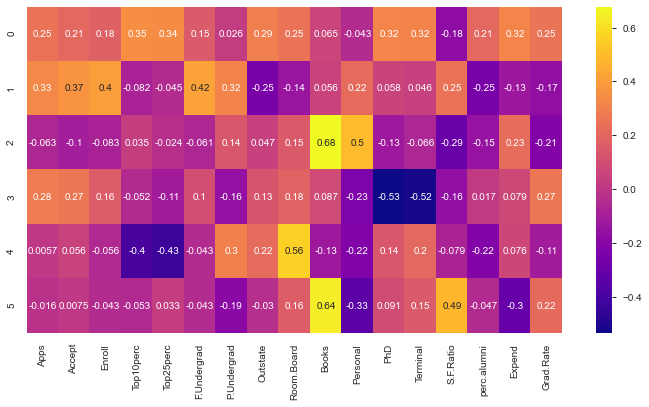

In [162]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp_std,annot=True,cmap='plasma',)

<AxesSubplot:>

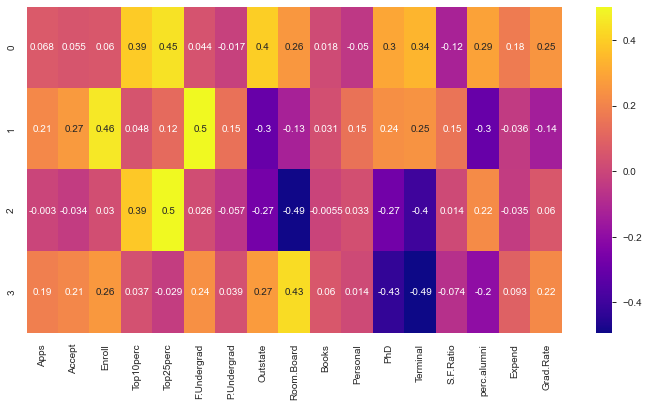

In [118]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp_minmax,annot=True,cmap='plasma',)

<AxesSubplot:>

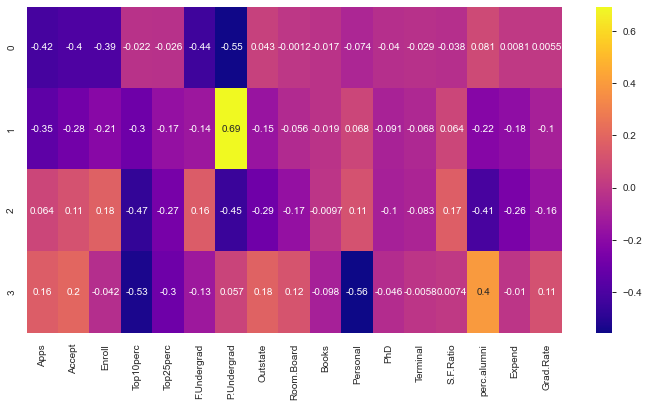

In [119]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp_log,annot=True,cmap='plasma',)